## **Importing Libraries**

In [216]:
# Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(5, 20), dpi=300)
from sklearn import preprocessing
from sklearn import manifold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from plotnine import ggplot, aes, geom_line, geom_abline, ggtitle, xlab, ylab
from sklearn.preprocessing import MinMaxScaler
import random 
from sklearn import metrics
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

<Figure size 1500x6000 with 0 Axes>

## **Importing Dataset and Merging**

In [217]:
# Load data
features = pd.read_csv("Features.csv")
labels = pd.read_csv("Target.CSV")

## **Data Pre-Processing**



---


**Concatenating columnwise**

---


In [218]:
data = pd.concat([features, labels], axis=1)



---


**Replacing and Eliminating certain class value**

---


In [219]:
data['BlcaGrade'] = data['BlcaGrade'].replace('Grade I', 'Stage I')
data['BlcaGrade'] = data['BlcaGrade'].replace('Grade II', 'Stage II')
data['BlcaGrade'] = data['BlcaGrade'].replace('Grade III', 'Stage III')
data['BlcaGrade'] = data['BlcaGrade'].replace('Grade IV', 'Stage IV')
# Replacing
data['BlcaGrade'] = data['BlcaGrade'].replace('Stage I', 'Stage II')
# Eliminating
data = data.drop(data[(data['BlcaGrade'] == 'Stage III')].index)
data['BlcaGrade'].value_counts()
label_names = ['Stage II', 'Stage IV']



---


**Encoding Labels**

---



```
0: Stage II
1: Stage IV
```




In [220]:
# label_encoder
label_encoder = preprocessing.LabelEncoder()
data['BlcaGrade']= label_encoder.fit_transform(data['BlcaGrade'])
data['BlcaGrade'].value_counts()

1    142
0    138
Name: BlcaGrade, dtype: int64

---


**Duplicate entry checking**

---

In [210]:
# Outputs the total number of rows in the dataframe.
print("Total entries: ", len(data))
# 'duplicates = df.duplicated()' uses the duplicated method to create a boolean series indicating whether each row is a duplicate or not.
duplicates = data.duplicated()
# 'duplicate_rows = df[duplicates]' uses the boolean series to index the dataframe and obtain a sub-dataframe containing only the duplicate rows.
duplicate_rows = data[duplicates]
# Outputs the number of duplicate rows in the sub-dataframe.
print("Duplicate entries: ", len(duplicate_rows))

Total entries:  280
Duplicate entries:  0




---


**NULL entry checking**

---


In [7]:
print("NULL Entries: ", data.isnull().sum().sum())

NULL Entries:  0


## **t-SNE**

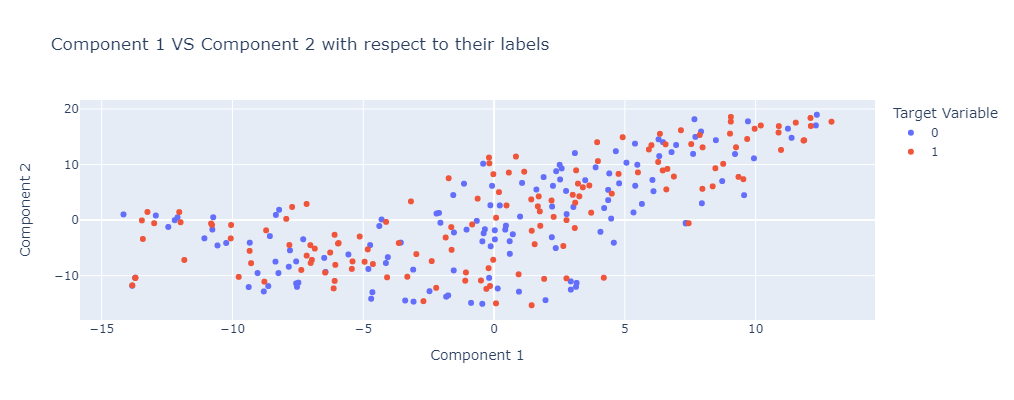

In [8]:
# dimensionality reduction using t-SNE
tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(data.drop('BlcaGrade',axis=1))
# create dataframe
cps_df = pd.DataFrame(columns=['Component 1', 'Component 2', 'target'], data=np.column_stack((mnist_tr, data['BlcaGrade'])))
# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)

fig = px.scatter(
    cps_df, x='Component 1', y='Component 2',
    color=cps_df.target.astype(str), labels={'color': 'Target Variable'}, width=600, height=400, title="Component 1 VS Component 2 with respect to their labels")
fig.show()

## **Reducing features with Mutual Info**

In [224]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

X = data.drop('BlcaGrade',axis=1)
y = data['BlcaGrade']

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
best_cols = SelectKBest(mutual_info_classif, k=100)
best_cols.fit(X, y)
print((X.columns[best_cols.get_support()]))

reducedFeatures = pd.DataFrame(X.columns[best_cols.get_support()])
reducedFeatures.to_csv("ReducedFeatures.csv")

selectedFeatures = list(X.columns[best_cols.get_support()])
#selectedFeatures = [X.columns[best_cols.get_support()]]

Index(['ADIPOR2', 'MYOC', 'VCL', 'MRPS10', 'PARP12', 'NFYC', 'PTGS2',
       'TP53INP2', 'CD59', 'TMEM40', 'RGS1', 'SORBS1', 'HNRNPM', 'RANBP1',
       'PGK1', 'TLE5', 'HSPB1', 'RARRES2', 'CXCL12', 'UNC5B', 'ALDH3A1',
       'BST1', 'ATP5F1B', 'BCL6', 'NR4A3', 'CXCR4', 'CD244', 'SOX4', 'ERGIC3',
       'IDO1', 'BARX1', 'RAB25', 'HMGCS2', 'FST', 'ARGLU1', 'ETS1', 'EHF',
       'CKAP4', 'DDX56', 'SLCO2B1', 'RAB15', 'RETREG3', 'S100A8', 'RAB5A',
       'SCUBE3', 'INA', 'MMP3', 'BATF', 'PRAC1', 'CLIC6', 'TMEM69', 'TLCD1',
       'KCNF1', 'RPL22L1', 'C4orf3', 'GEM', 'PSIP1', 'HNRNPK', 'CCT2', 'GPX4',
       'TUBA1A', 'FEN1', 'TMEM129', 'FOS', 'KRT75', 'PFKFB3', 'RPS9', 'PWWP2B',
       'CYP4F11', 'GNG12', 'RNF213', 'SNHG29', 'SFN', 'MYLPF', 'NAA38', 'FHL3',
       'H2AC20', 'SNN', 'KRT10', 'HES4', 'SUMO2', 'SPRR2B', 'NCOA6', 'C2orf72',
       'PSMB10', 'MT-TC', 'MT-TT', 'IGHV3-11', 'EMP2', 'UBA52', 'IGHV4-59',
       'NDUFAF8', 'MTCO2P12', 'LINC00993', 'RTL9', 'APOBEC3C', 'RN7SL648P',
     

In [226]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

X = data.drop('BlcaGrade',axis=1)
y = data['BlcaGrade']

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
best_cols = SelectKBest(mutual_info_classif, k=100)
best_cols.fit(X, y)
print((X.columns[best_cols.get_support()]))

reducedFeatures = pd.DataFrame(X.columns[best_cols.get_support()])
reducedFeatures.to_csv("ReducedFeatures.csv")

selectedFeatures = list(X.columns[best_cols.get_support()])

Index(['CX3CL1', 'ADIPOR2', 'VCL', 'MRPS10', 'PARP12', 'NFYC', 'PTGS2',
       'TP53INP2', 'CD59', 'TMEM40', 'RGS1', 'SORBS1', 'HNRNPM', 'RANBP1',
       'PGK1', 'TLE5', 'HSPB1', 'RARRES2', 'CXCL12', 'UNC5B', 'ALDH3A1', 'PPY',
       'BST1', 'ATP5F1B', 'BCL6', 'NR4A3', 'CXCR4', 'CD244', 'SOX4', 'ERGIC3',
       'IDO1', 'RAB25', 'HMGCS2', 'FST', 'ARGLU1', 'EHF', 'CKAP4', 'DDX56',
       'SLCO2B1', 'RAB15', 'RETREG3', 'S100A8', 'RAB5A', 'SCUBE3', 'INA',
       'MMP3', 'BATF', 'GLYATL2', 'CLIC6', 'TMEM69', 'TLCD1', 'KCNF1',
       'RPL22L1', 'C4orf3', 'GEM', 'PSIP1', 'HNRNPK', 'CCT2', 'GPX4', 'TUBA1A',
       'FEN1', 'SERPINA6', 'FOS', 'PFKFB3', 'RPS9', 'PWWP2B', 'CYP4F11',
       'GNG12', 'MUCL1', 'RNF213', 'SNHG29', 'SFN', 'MYLPF', 'NAA38', 'FHL3',
       'KRTAP8-1', 'H2AC20', 'SNN', 'KRT10', 'HES4', 'SUMO2', 'NCOA6',
       'SNORA74A', 'C2orf72', 'MUC21', 'PSMB10', 'MT-TC', 'MT-TT', 'EMP2',
       'UBA52', 'IGHV4-59', 'NDUFAF8', 'MTCO2P12', 'LINC00993', 'APOBEC3C',
       'GFY', 'CWC25

TypeError: 'list' object is not callable

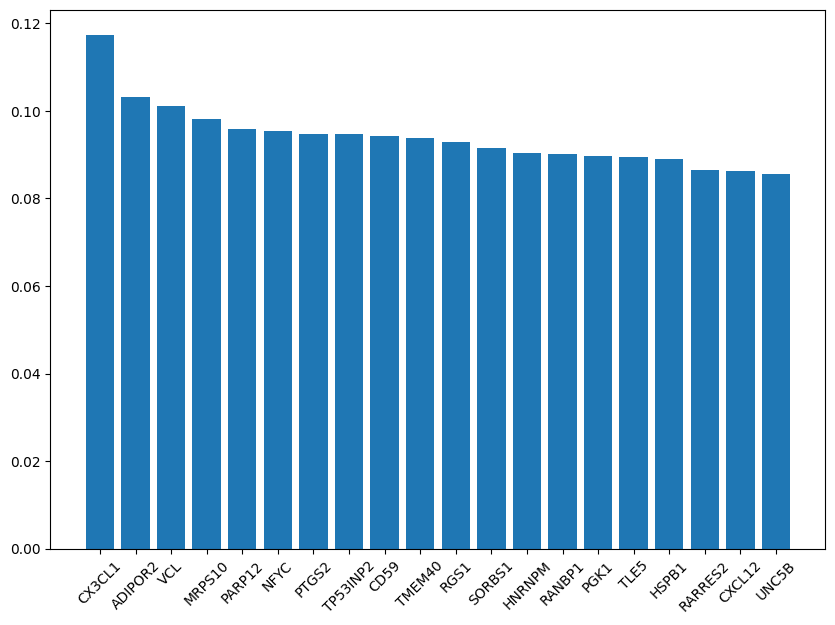

In [10]:
score = list(best_cols.scores_)
score.sort(reverse=True)
score[:100]
# Figure Size
fig = plt.figure(figsize =(10, 7))
# Horizontal Bar Plot
plt.bar(best_cols.get_feature_names_out(X.columns)[:20], score[:20])
plt.xticks(rotation = 45)
# Show Plot
plt.show()

## **Split into features and target variable**

In [225]:
X = data[selectedFeatures].values
y = data['BlcaGrade'].values

KeyError: "None of [Index([('ADIPOR2', 'MYOC', 'VCL', 'MRPS10', 'PARP12', 'NFYC', 'PTGS2', 'TP53INP2', 'CD59', 'TMEM40', 'RGS1', 'SORBS1', 'HNRNPM', 'RANBP1', 'PGK1', 'TLE5', 'HSPB1', 'RARRES2', 'CXCL12', 'UNC5B', 'ALDH3A1', 'BST1', 'ATP5F1B', 'BCL6', 'NR4A3', 'CXCR4', 'CD244', 'SOX4', 'ERGIC3', 'IDO1', 'BARX1', 'RAB25', 'HMGCS2', 'FST', 'ARGLU1', 'ETS1', 'EHF', 'CKAP4', 'DDX56', 'SLCO2B1', 'RAB15', 'RETREG3', 'S100A8', 'RAB5A', 'SCUBE3', 'INA', 'MMP3', 'BATF', 'PRAC1', 'CLIC6', 'TMEM69', 'TLCD1', 'KCNF1', 'RPL22L1', 'C4orf3', 'GEM', 'PSIP1', 'HNRNPK', 'CCT2', 'GPX4', 'TUBA1A', 'FEN1', 'TMEM129', 'FOS', 'KRT75', 'PFKFB3', 'RPS9', 'PWWP2B', 'CYP4F11', 'GNG12', 'RNF213', 'SNHG29', 'SFN', 'MYLPF', 'NAA38', 'FHL3', 'H2AC20', 'SNN', 'KRT10', 'HES4', 'SUMO2', 'SPRR2B', 'NCOA6', 'C2orf72', 'PSMB10', 'MT-TC', 'MT-TT', 'IGHV3-11', 'EMP2', 'UBA52', 'IGHV4-59', 'NDUFAF8', 'MTCO2P12', 'LINC00993', 'RTL9', 'APOBEC3C', 'RN7SL648P', 'CWC25', 'EPOP', 'H2AC8')], dtype='object')] are in the [columns]"

## **Defining Outer CV**

In [161]:
k = len(y)/3 # Define the split size of outer cv here
k = int(k)

# Train 1, Train 2, Test 3 - Outer CV 1
outerFold_features_1 = X[:k]
outerFold_labels_1 = y[:k]
# Train 1, Test 2, Train 3 - Outer CV 2
outerFold_features_2 = X[k:2*k]
outerFold_labels_2 = y[k:2*k]
# Test 1, Train 2, Train 3 - Outer CV 3
outerFold_features_3 = X[2*k:(3*k)+1]
outerFold_labels_3 = y[2*k:(3*k)+1]

# Training Features and Labels for 1st Outer CV
features_1 = np.concatenate([outerFold_features_1, outerFold_features_2])
label_1 = np.concatenate([outerFold_labels_1, outerFold_labels_2])
# Training Features and Labels for 2nd Outer CV
features_2 = np.concatenate([outerFold_features_1, outerFold_features_3])
label_2 = np.concatenate([outerFold_labels_1, outerFold_labels_3])
# Training Features and Labels for 3rd Outer CV
features_3 = np.concatenate([outerFold_features_2, outerFold_features_3])
label_3 = np.concatenate([outerFold_labels_2, outerFold_labels_3])

## **Function Definitions**

In [162]:
# ---------------------------------------------------------------------------------------------------------------
# This function prints a formatted string to the console with information about the current iteration in inner CV
# ---------------------------------------------------------------------------------------------------------------
def disp(count, feature, p1, p2, trainResult, testResult, selected, clf_arguments1, clf_arguments2):
  ''' This function prints a formatted string to the console with information about the current iteration in inner CV

      args: (9 arguments)
        count - Iteration count
        feature - Particularly the best feature
        p1 - One of the parameter value for classifier
        p2 - Another parameter value for classifier
        trainResult - Mean training accuracy of a particular iteration in inner cv
        testResult - Mean test accuracy of a particular iteration in innver cv
        selected - Global variable reference 'featuresOuterFold'; It stores the best features as the iteration goes on for inner cv
        clf_arguments1 - Name for one of the parameter of classifier
        clf_arguments2 - Name for another parameter of classifier

      Returns:
        No return value
  '''
  print("Iteration " + str(count) + " >> Feature: " + str(feature) + "; " + clf_arguments1 + ": " + str(p1) + "; " + clf_arguments2 + ": " + str(p2) + "; Train Accuracy: " + str(round(trainResult, 4)) + "; Test Accuracy: " + str(round(testResult, 4)) + "; Selected Features: " + str(selected))
  print("---------------------------------------------------------------------------------------------------------------------------------")
# ----------------------------------------------------------------
# This function is used to perform inner cross-validation with FFS 
# ----------------------------------------------------------------
def innerCV(count, features, param1, param2, X, y, cv, clf, clf_arguments1, clf_arguments2):
  '''
    This function is used to perform inner cross-validation on a machine learning algorithm, where two parameters are being optimized.
    The function loops through all possible combinations of parameter values and feature indices.
    
    args: 
      count - Iteration count
      feautres - Reduced features from Mutual Information
      param1 - One of the parameter value for classifier
      param2 - Another parameter value for classifier
      X - Features of a particular outerfold 
      y - Target Variable of a particular outerfold 
      cv - K value for inner cv
      clf - Class name of classifier
      clf_arguments1 - Name for one of the parameter of classifier
      clf_arguments2 - Name for another parameter of classifier
    
    Returns:
      feature - The best feature index found in the loop
  '''

  temp = 0.0

  for i in features:
    for j in param1:
      for k in param2:
        # This line creates a dictionary called args containing the two parameter values being tested in this iteration of the loop
        args = {clf_arguments1:j, clf_arguments2:k}
        # This line uses scikit-learn's cross_validate function to perform cross-validation on the machine learning algorithm being tested (clf) 
        # It passes in the args dictionary as the parameters to the algorithm
        scores = cross_validate(clf(**args), X[:, i - 1].reshape(-1, 1), y, cv=cv, return_train_score=True)
         # This line checks if the current test score is greater than or equal to the current best test score 
        if temp <= (float)(scores['test_score'].mean()):
          # This line updates the best test score to be the current test score
          temp = (float)(scores['test_score'].mean())
          # This line stores the mean training score for the current iteration
          trainResult = scores['train_score'].mean()
          # This line stores the mean test score for the current iteration
          testResult = scores['test_score'].mean()
          # Select the best feature in each iteration
          feature = i
          # Select the best parameters in each iteration
          p1 = j
          # Select the best parameters in each iteration
          p2 = k
  # This line appends the current best feature to a global list
  featuresOuterFold.append(feature)
  # This line calls a function called disp to print out information about the current iteration of the program
  disp(count, feature, p1, p2, trainResult, testResult, featuresOuterFold, clf_arguments1, clf_arguments2)
  # This line returns the best feature index found in the loop
  return feature
# ------------------------------------------------------------------------------
# This function implements the outer loop of the nested cross-validation process 
# ------------------------------------------------------------------------------
def outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, X, y):
  '''
  A function to perform the outer fold cross-validation by iterating over the features and hyperparameters to find the best combination of both. 
  The function takes the following arguments:
  
  args:
    clf - Class name of classifier 
    clf_arguments1 - Name for one of the parameter of classifier
    clf_arguments2 - Name for another parameter of classifier
    param1 - One of the parameter value for classifier
    param2 - Another parameter value for classifier
    X - Features of a particular outerfold 
    y - Target Variable of a particular outerfold 
  
  Returns:
    No return value
  '''
  ## Create a list of reduced feature numbers from 1 to the total number of selected features
  features = [i+1 for i in range(len(selectedFeatures))]
  # Remove the last parameter value from params1 list and assign it to param1 variable
  param1 = params1.pop()
  # Remove the last parameter value from params2 list and assign it to param2 variable
  param2 = params2.pop()

  # Loop through the outer fold cross-validation iterations, from 1 to 5 (inclusive)
  for i in range(1, 6):
    if i == 1:
      # Call the innerCV function with the first set of features and hyperparameters
      feature = innerCV(i, features, param1, param2, X, y, 5, clf, clf_arguments1, clf_arguments2)
    else:
      # Remove the previously selected feature from the features list
      features.remove(feature)
      # Remove the last parameter value from params1 list and assign it to param1 variable
      param1 = params1.pop()
      # Remove the last parameter value from params2 list and assign it to param2 variable
      param2 = params2.pop()
      # Call the innerCV function with the updated set of features and hyperparameters
      # Store the best feature in the feature variable
      feature = innerCV(i, features, param1, param2, X, y, 5, clf, clf_arguments1, clf_arguments2)

In [163]:
# -------------------------------------------------------------------------------------------------------
# This function is used to evaluate the performance of a classifier on the outer fold of cross-validation 
# -------------------------------------------------------------------------------------------------------
def evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, selectedF, X, y, outerFold_features, outerFold_labels, label_names):
  '''
  This function is used to evaluate the performance of a classifier on the outer fold of cross-validation.

  args:
    clf_name: a string specifying the name of the classifier being used
    clf: the name of the classifier class
    clf_arguments1: a string specifying the name of one of the parameters of the classifier
    clf_arguments2: a string specifying the name of another parameter of the classifier
    param1: the value for the first parameter of the classifier
    param2: the value for the second parameter of the classifier
    selectedF: Index list of top 5 features from nested FFS on outer CV training data
    X: Values of top 5 features in the dataset
    y: Corresponding target variable of the top 5 features
    outerFold_features: Unseen feature data from outer fold
    outerFold_labels: Unseen corresponding target variable from outer fold
    label_names: a list of two strings specifying the names of the two classes in the target variable for plot of confusion matrix
  
  Returns:
    No return value
  '''
  # Mapping features from list to array - Array starts with 0 but list doesn't
  selectedF = [x - 1 for x in featuresOuterFold]
  # -----------------------------------------------------------------------------------------
  # Training classifier with the parameters and features with best accuracy found in inner CV
  # -----------------------------------------------------------------------------------------
  '''
  This block of code checks if the classifier is SVM, and if it is, it sets probability to True while creating a new instance of the classifier.
  It creates a dictionary of the classifier arguments (clf_arguments1 and clf_arguments2) and their corresponding values (param1 and param2),
  and passes them as keyword arguments to the classifier function, creating an instance of the classifier.
  If the classifier is not SVM, it creates a new instance of the classifier using the same dictionary of arguments without setting the probability parameter.
  Finally, it fits the created classifier instance on the selected features (selectedF) of the training data (X) and their corresponding labels (y).
  '''
  if clf_name == 'SVM':
    args = {clf_arguments1:param1, clf_arguments2:param2}
    classifier = clf(**args, probability=True)
  else:
    args = {clf_arguments1:param1, clf_arguments2:param2}
    classifier = clf(**args)
  classifier.fit(X[:, selectedF], y)
  print("--------------------------------------------------------------------------------------------------")
  print("Training Score on outer fold:", round(classifier.score(X[:, selectedF], y), 6) * 100)
  print("--------------------------------------------------------------------------------------------------")
  # --------------------------------------------------------------------------------------------------
  # Testing on Outer CV
  # --------------------------------------------------------------------------------------------------
  y_predict = classifier.predict(outerFold_features[:, selectedF])
  print("Test Accuracy on outer fold:", round(accuracy_score(outerFold_labels, y_predict), 6) * 100)
  print("--------------------------------------------------------------------------------------------------")
  print(clf_arguments1 + ": " + str(param1))
  print(clf_arguments2 + ": " + str(param2))
  print("Features: ", featuresOuterFold)
  print("--------------------------------------------------------------------------------------------------")
  # --------------------------------------------------------------------------------------------------
  # Classification Report
  # --------------------------------------------------------------------------------------------------
  print(classification_report(outerFold_labels, y_predict, digits=6))
  print("--------------------------------------------------------------------------------------------------")
  # --------------------------------------------------------------------------------------------------
  # ROC AUC Curve and Score
  # --------------------------------------------------------------------------------------------------
  # Generating a list of 0 with the length of outerFold_labels
  ns_probs = [0 for _ in range(len(outerFold_labels))]
  # Predicting class probabilities for the test set using the classifier
  lr_probs = classifier.predict_proba(outerFold_features[:, selectedF])
  # Selecting only the probabilities for the positive class
  lr_probs = lr_probs[:, 1]
  # Calculating the ROC AUC score for a model that predicts only 0's
  ns_auc = roc_auc_score(outerFold_labels, ns_probs)
  # Calculating the ROC AUC score for the classifier
  lr_auc = roc_auc_score(outerFold_labels, lr_probs)
  # Print the no skill ROC AUC score and the ROC AUC score of the classifier
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print(clf_name + ': ROC AUC=%.3f' % (lr_auc))
  print("--------------------------------------------------------------------------------------------------")

  # Compute the false positive rate, true positive rate and thresholds for the no skill model and the classifier
  ns_fpr, ns_tpr, _ = roc_curve(outerFold_labels, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(outerFold_labels, lr_probs)

  # Plot the ROC curves for the no skill model and the classifier
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(lr_fpr, lr_tpr, marker='.', label=clf_name)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.title(clf_name)
  plt.show()
  print("--------------------------------------------------------------------------------------------------")
  print("Confusion Matrix")
  print("--------------------------------------------------------------------------------------------------")
  ax= plt.subplot()
  plt.title(clf_name)
  metrics.ConfusionMatrixDisplay(
  confusion_matrix = metrics.confusion_matrix(outerFold_labels, y_predict), display_labels = [label_names[0], label_names[1]]).plot(ax=ax, cmap=plt.cm.Greens);
  # ------------------------------------------------------------------------------------------------------------
  # These lines append various metrics and information to global variables to be used later for further analysis
  # ------------------------------------------------------------------------------------------------------------
  param_1.append(param1)
  param_2.append(param2)
  trainScore.append(round(classifier.score(X[:, selectedF], y), 6) * 100)
  testScore.append(round(accuracy_score(outerFold_labels, y_predict), 6) * 100)
  falsePositiveRate.append(lr_fpr)
  truePositiveRate.append(lr_tpr)
  aucScore.append(lr_auc)
  featureSubset.append(featuresOuterFold)

In [164]:
def combinedROCPlot(clf_name, featureSubset, param_1, param_2, trainScore, testScore, aucScore, falsePositiveRate, truePositiveRate):
  '''
  This is a function that plots a combined ROC curve for a given classifier over multiple outer folds of cross-validation. 
  The function takes in the following parameters:
  
  args:
    clf_name: the name of the classifier being used
    featureSubset: a list containing the selected feature subset for each outer fold
    param_1: a list containing the value of the first hyperparameter for the classifier for each outer fold
    param_2: a list containing the value of the second hyperparameter for the classifier for each outer fold
    trainScore: a list containing the training score for the classifier for each outer fold
    testScore: a list containing the testing score for the classifier for each outer fold
    aucScore: a list containing the AUC score for the classifier for each outer fold
    falsePositiveRate: a list containing the false positive rate for the ROC curve for each outer fold
    truePositiveRate: a list containing the true positive rate for the ROC curve for each outer fold
  '''
  # Plot the No Skill line
  plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

  # Iterate over each outer fold and print out the results
  for i in range(0, 3):
    print("--------------------------------------------")
    print("Outer Fold " + str(i + 1) + " Result")
    print("--------------------------------------------")
    print("Feature Subset: ", featureSubset[i])
    print("Best n_estimator: ", param_1[i])
    print("Best max_depth: ", param_2[i])
    print("Train Score: ", trainScore[i])
    print("Test Score: ", testScore[i])
    print("AUC Score: ", aucScore[i])

  # Iterate over each outer fold and plot the ROC curve for that fold
  for i in range(0, 3):
    plt.plot(falsePositiveRate[i], truePositiveRate[i], marker='.', label = clf_name + ' - Outer Fold ' + str(i+1))

  # Add axis labels, legend, and display the graph
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

# **Result**

## **Random Forest**

In [76]:
# Global variables
# These lines of code are initializing several empty lists 
# which will be used later in the program to store data or results
# Resetting global variable data for other classifiers
param_1 = []
param_2 = []
trainScore = []
testScore = []
falsePositiveRate = []
truePositiveRate = []
aucScore = []
featureSubset = []



---


### **Evaluating Outer Fold 1**

---



In [77]:
# Classifier Name
clf_name = 'Random Forest'
# Classifier's class name
clf = RandomForestClassifier
# Argument 1 name for classifier 
clf_arguments1 = 'n_estimators'
# Argument 2 name for classifier
clf_arguments2 = 'max_depth'
params1 = [[5, 10, 15], [20, 25, 30], [35, 40, 45], [50, 55, 60], [65, 80, 100]]
# max_depth parameter list for Random Forest
params2 = [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_1, label_1)

Iteration 1 >> Feature: 65; n_estimators: 100; max_depth: 5; Train Accuracy: 0.8548; Test Accuracy: 0.6563; Selected Features: [65]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 69; n_estimators: 60; max_depth: 4; Train Accuracy: 0.7836; Test Accuracy: 0.6612; Selected Features: [65, 69]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 47; n_estimators: 35; max_depth: 3; Train Accuracy: 0.7231; Test Accuracy: 0.6553; Selected Features: [65, 69, 47]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 84; n_estimators: 20; max_depth: 3; Train Accuracy: 0.711; Test Accuracy: 0.6667; Selected Features: [65, 69, 47, 84]
--------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 82.79570000000001
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 55.3191
--------------------------------------------------------------------------------------------------
n_estimators: 35
max_depth: 3
Features:  [65, 69, 47, 84, 37]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.500000  0.523810  0.511628        42
           1   0.600000  0.576923  0.588235        52

    accuracy                       0.553191        94
   macro avg   0.550000  0.550366  0.549932        94
weighted avg   0.555319  0.553191  0.554006        94

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Random 

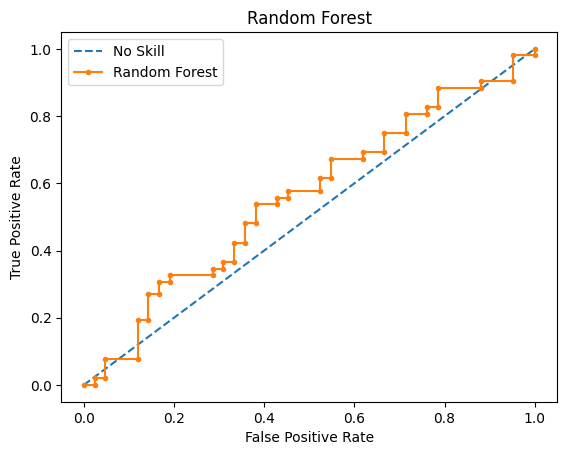

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


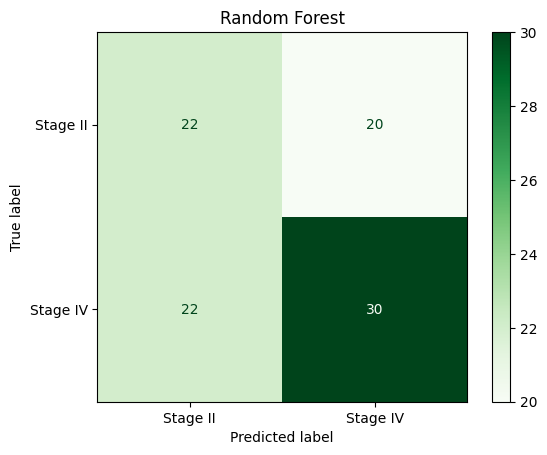

In [79]:
# Values of argument 1 parameter list for classifier
param1 = 35
# Values of argument 2 parameter list for classifier
param2 = 3

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold,
                    features_1, label_1, outerFold_features_3, outerFold_labels_3, label_names)



---


### **Evaluating Outer Fold 2**

---



In [80]:
# Values of argument 1 parameter list for classifier
params1 = [[5, 10, 15], [20, 25, 30], [35, 40, 45], [50, 55, 60], [70,75,150]]
# max_depth parameter list for Random Forest
params2 = [[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7]]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_2, label_2)

Iteration 1 >> Feature: 41; n_estimators: 150; max_depth: 6; Train Accuracy: 0.877; Test Accuracy: 0.6468; Selected Features: [41]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 54; n_estimators: 55; max_depth: 5; Train Accuracy: 0.8369; Test Accuracy: 0.6259; Selected Features: [41, 54]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 82; n_estimators: 45; max_depth: 4; Train Accuracy: 0.7366; Test Accuracy: 0.637; Selected Features: [41, 54, 82]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 53; n_estimators: 20; max_depth: 3; Train Accuracy: 0.7033; Test Accuracy: 0.642; Selected Features: [41, 54, 82, 53]
----------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 81.2834
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 60.2151
--------------------------------------------------------------------------------------------------
n_estimators: 20
max_depth: 3
Features:  [88, 6, 77, 66, 2]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.619048  0.553191  0.584270        47
           1   0.588235  0.652174  0.618557        46

    accuracy                       0.602151        93
   macro avg   0.603641  0.602683  0.601413        93
weighted avg   0.603807  0.602151  0.601229        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Random Forest: ROC 

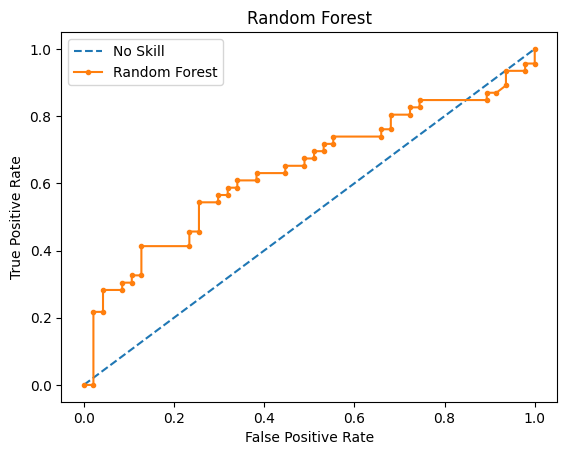

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


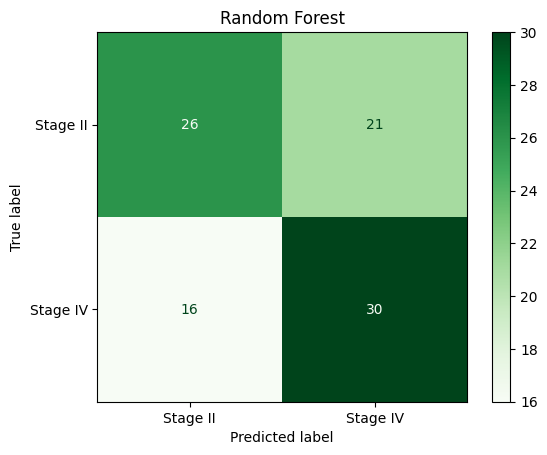

In [85]:
# Values of argument 1 parameter list for classifier
param1 = 20
# Values of argument 2 parameter list for classifier
param2 = 3

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_2, label_2, outerFold_features_2, outerFold_labels_2, label_names)



---


### **Evaluating Outer Fold 3**

---



In [82]:
# Values of argument 1 parameter list for classifier
params1 = [[3, 10, 15], [50, 25, 30], [35, 60, 45], [40, 55, 60], [200,90, 100]]
# max_depth parameter list for Random Forest
params2 = [[1, 2, 3], [2, 5, 4], [3, 4, 5], [4, 5, 6], [4, 8, 7]]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_3, label_3)

Iteration 1 >> Feature: 88; n_estimators: 90; max_depth: 8; Train Accuracy: 0.9185; Test Accuracy: 0.6691; Selected Features: [88]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 6; n_estimators: 60; max_depth: 6; Train Accuracy: 0.869; Test Accuracy: 0.6573; Selected Features: [88, 6]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 77; n_estimators: 35; max_depth: 5; Train Accuracy: 0.8021; Test Accuracy: 0.663; Selected Features: [88, 6, 77]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 66; n_estimators: 50; max_depth: 5; Train Accuracy: 0.8355; Test Accuracy: 0.6585; Selected Features: [88, 6, 77, 66]
--------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 94.6524
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 47.3118
--------------------------------------------------------------------------------------------------
n_estimators: 35
max_depth: 5
Features:  [88, 6, 77, 66, 2]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.500000  0.367347  0.423529        49
           1   0.456140  0.590909  0.514851        44

    accuracy                       0.473118        93
   macro avg   0.478070  0.479128  0.469190        93
weighted avg   0.479249  0.473118  0.466736        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Random Forest: ROC 

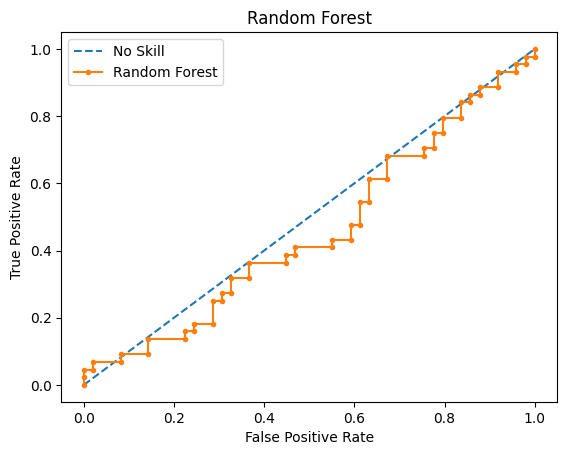

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


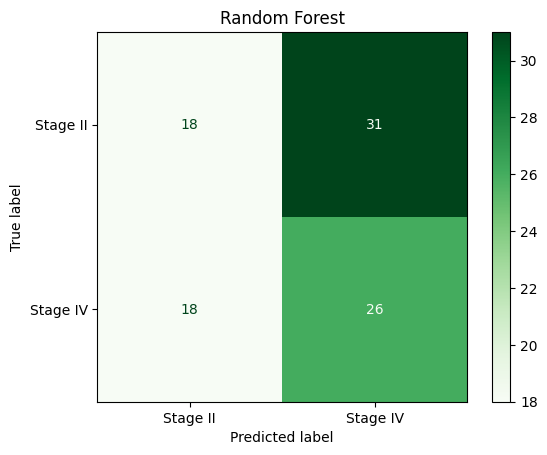

In [83]:
# Values of argument 1 parameter list for classifier
param1 = 35
# Values of argument 2 parameter list for classifier
param2 = 5

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_3, label_3, outerFold_features_1, outerFold_labels_1, label_names)

### **Comparison among Outer Fold Results**

--------------------------------------------
Outer Fold 1 Result
--------------------------------------------
Feature Subset:  [65, 69, 47, 84, 37]
Best n_estimator:  100
Best max_depth:  5
Train Score:  95.16130000000001
Test Score:  53.191500000000005
AUC Score:  0.559981684981685
--------------------------------------------
Outer Fold 2 Result
--------------------------------------------
Feature Subset:  [65, 69, 47, 84, 37]
Best n_estimator:  35
Best max_depth:  3
Train Score:  82.79570000000001
Test Score:  55.3191
AUC Score:  0.5590659340659341
--------------------------------------------
Outer Fold 3 Result
--------------------------------------------
Feature Subset:  [41, 54, 82, 53, 84]
Best n_estimator:  45
Best max_depth:  4
Train Score:  85.5615
Test Score:  52.688199999999995
AUC Score:  0.5948196114708604


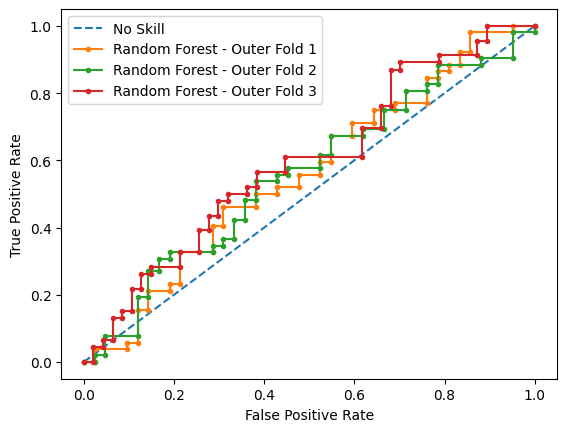

In [86]:
combinedROCPlot(clf_name, featureSubset, param_1, param_2, trainScore, testScore, aucScore, falsePositiveRate, truePositiveRate)

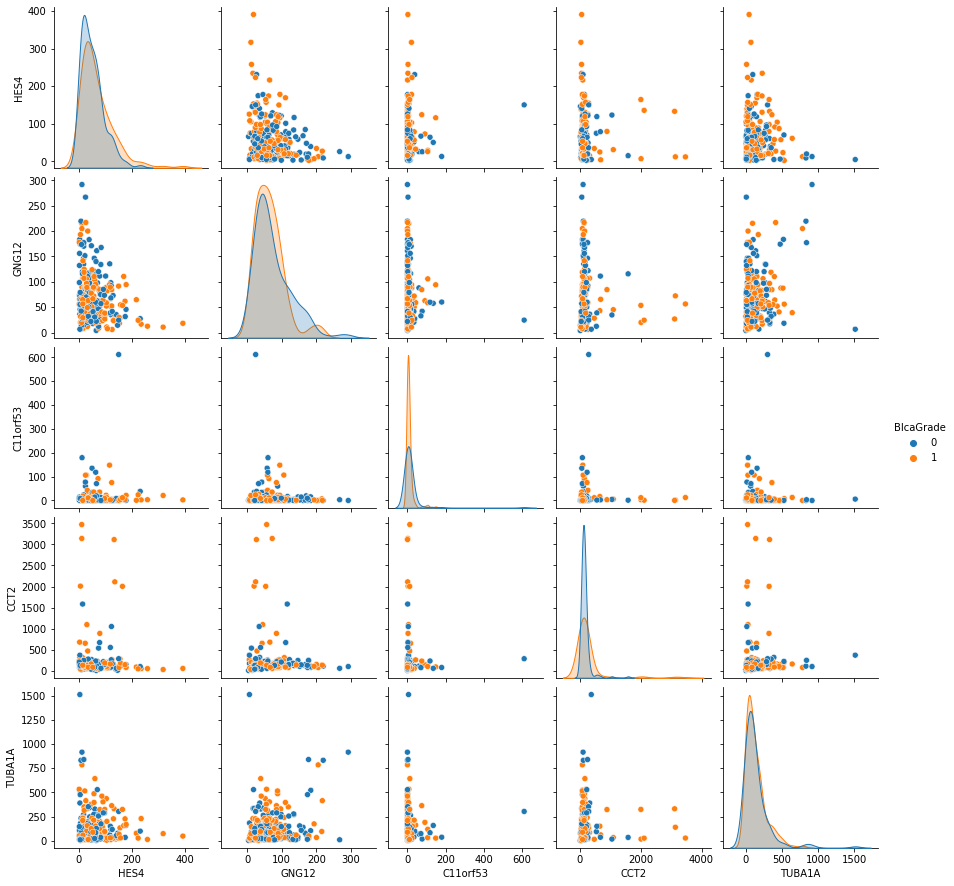

In [110]:
listB = [78, 68, 48, 59, 61]

res = list(map(selectedFeatures.__getitem__, listB))
res.append('BlcaGrade')
sns.pairplot(data[res], hue='BlcaGrade', palette='tab10')

## **SVM**

In [107]:
# Global variables
# These lines of code are initializing several empty lists 
# which will be used later in the program to store data or results
# Resetting global variable data for other classifiers
param_1 = []
param_2 = []
trainScore = []
testScore = []
falsePositiveRate = []
truePositiveRate = []
aucScore = []
featureSubset = []



---


### **Evaluating Outer Fold 1**

---



In [109]:
# Classifier Name
clf_name = 'SVM'
# Classifier's class name
clf = SVC
# Argument 1 name for classifier 
clf_arguments1 = 'C'
# Argument 2 name for classifier
clf_arguments2 = 'kernel'
# Values of argument 1 parameter list for classifier
params1 = [[0.01, 0.1], [0.001,1], [0.002, 1], [1, 0.003 ], [0.1,1]]
# Values of argument 2 parameter list for classifier
params2 = [['rbf'], ['rbf'], ['rbf'], ['rbf'], ['rbf']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_1, label_1)

Iteration 1 >> Feature: 53; C: 1; kernel: rbf; Train Accuracy: 0.6291; Test Accuracy: 0.624; Selected Features: [53]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 84; C: 1; kernel: rbf; Train Accuracy: 0.6035; Test Accuracy: 0.6078; Selected Features: [53, 84]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 36; C: 1; kernel: rbf; Train Accuracy: 0.6264; Test Accuracy: 0.603; Selected Features: [53, 84, 36]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 34; C: 1; kernel: rbf; Train Accuracy: 0.6103; Test Accuracy: 0.5974; Selected Features: [53, 84, 36, 34]
--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 66.129
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 46.808499999999995
--------------------------------------------------------------------------------------------------
C: 1
kernel: rbf
Features:  [53, 84, 36, 34, 95]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.404762  0.404762  0.404762        42
           1   0.519231  0.519231  0.519231        52

    accuracy                       0.468085        94
   macro avg   0.461996  0.461996  0.461996        94
weighted avg   0.468085  0.468085  0.468085        94

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
SVM: ROC AUC=0.475
-

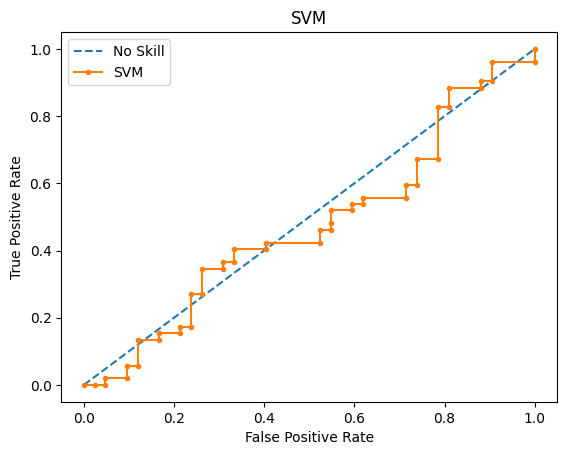

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


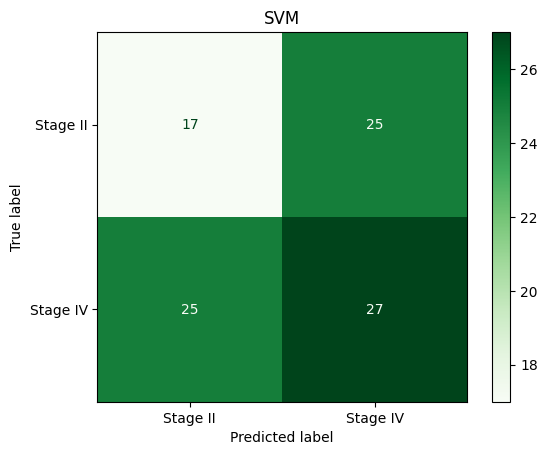

In [110]:
# Values of argument 1 parameter list for classifier
param1 = 1
# Values of argument 2 parameter list for classifier
param2 = 'rbf'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_1, label_1, outerFold_features_3, outerFold_labels_3, label_names)



---


### **Evaluating Outer Fold 2**

---



In [71]:
# Values of argument 1 parameter list for classifier
params1 = [[0.01,0.0001], [0.001,1], [0.001, 0.1], [0.002, 0.1], [0.001, 0.002]]
# Values of argument 2 parameter list for classifier
params2 = [['rbf'], ['rbf'], ['rbf'], ['rbf'], ['rbf']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_2, label_2)

Iteration 1 >> Feature: 100; C: 0.002; kernel: rbf; Train Accuracy: 0.5134; Test Accuracy: 0.5134; Selected Features: [100]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 24; C: 0.1; kernel: rbf; Train Accuracy: 0.5976; Test Accuracy: 0.5832; Selected Features: [100, 24]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 50; C: 0.1; kernel: rbf; Train Accuracy: 0.607; Test Accuracy: 0.5728; Selected Features: [100, 24, 50]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 53; C: 1; kernel: rbf; Train Accuracy: 0.619; Test Accuracy: 0.599; Selected Features: [100, 24, 50, 53]
--------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 51.3369
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 49.4624
--------------------------------------------------------------------------------------------------
C: 0.02
kernel: rbf
Features:  [100, 24, 50, 53, 99]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000        47
           1   0.494624  1.000000  0.661871        46

    accuracy                       0.494624        93
   macro avg   0.247312  0.500000  0.330935        93
weighted avg   0.244653  0.494624  0.327377        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
SVM: ROC AUC=0.466
-------

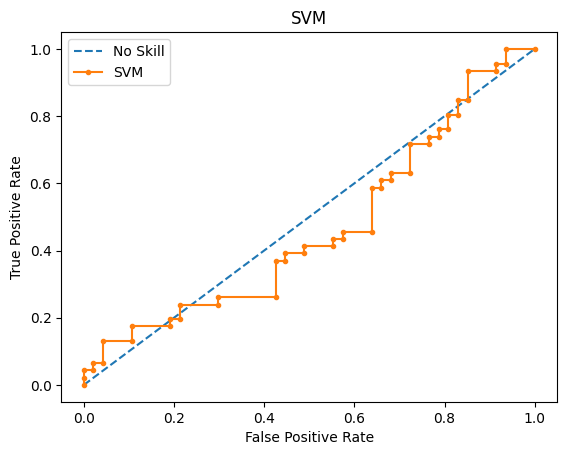

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


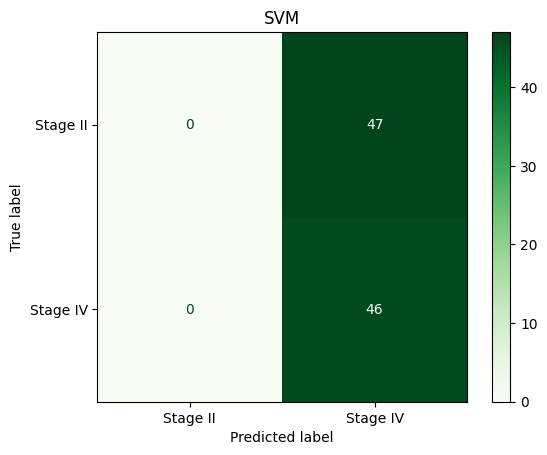

In [72]:
# Values of argument 1 parameter list for classifier
param1 = 0.02
# Values of argument 2 parameter list for classifier
param2 = 'rbf'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_2, label_2, outerFold_features_2, outerFold_labels_2, label_names)



---


### **Evaluating Outer Fold 3**

---



In [111]:
# Values of argument 1 parameter list for classifier
params1 = [[0.01,0.0001], [0.03, 0.002], [0.02, 0.1], [0.001, 0.1], [0.3, 0.02]]
# Values of argument 2 parameter list for classifier
params2 = [['rbf'], ['rbf'], ['rbf'], ['rbf'], ['rbf']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_3, label_3)

Iteration 1 >> Feature: 84; C: 0.3; kernel: rbf; Train Accuracy: 0.615; Test Accuracy: 0.599; Selected Features: [84]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 22; C: 0.1; kernel: rbf; Train Accuracy: 0.5963; Test Accuracy: 0.5936; Selected Features: [84, 22]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 67; C: 0.1; kernel: rbf; Train Accuracy: 0.5842; Test Accuracy: 0.572; Selected Features: [84, 22, 67]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 100; C: 0.002; kernel: rbf; Train Accuracy: 0.5241; Test Accuracy: 0.524; Selected Features: [84, 22, 67, 100]
----------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 58.288799999999995
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 45.1613
--------------------------------------------------------------------------------------------------
C: 0.3
kernel: rbf
Features:  [84, 22, 67, 100, 99]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.454545  0.204082  0.281690        49
           1   0.450704  0.727273  0.556522        44

    accuracy                       0.451613        93
   macro avg   0.452625  0.465677  0.419106        93
weighted avg   0.452728  0.451613  0.411718        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
SVM: ROC AUC=0.5

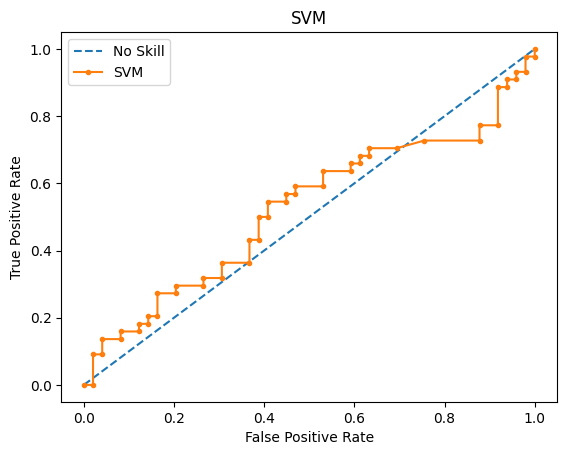

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


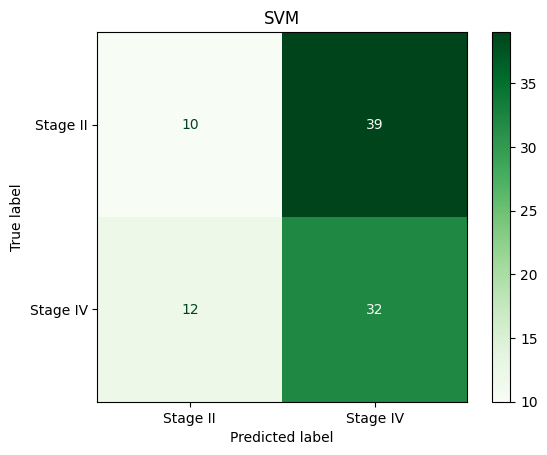

In [114]:
# Values of argument 1 parameter list for classifier
param1 = 0.3
# Values of argument 2 parameter list for classifier
param2 = 'rbf'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_3, label_3, outerFold_features_1, outerFold_labels_1, label_names)

### **Comparison among Outer Fold Results**

--------------------------------------------
Outer Fold 1 Result
--------------------------------------------
Feature Subset:  [53, 84, 36, 34, 95]
Best n_estimator:  1
Best max_depth:  rbf
Train Score:  66.129
Test Score:  46.808499999999995
AUC Score:  0.47481684981684985
--------------------------------------------
Outer Fold 2 Result
--------------------------------------------
Feature Subset:  [84, 22, 67, 100, 99]
Best n_estimator:  0.1
Best max_depth:  rbf
Train Score:  58.823499999999996
Test Score:  43.010799999999996
AUC Score:  0.4675324675324675
--------------------------------------------
Outer Fold 3 Result
--------------------------------------------
Feature Subset:  [84, 22, 67, 100, 99]
Best n_estimator:  0.002
Best max_depth:  rbf
Train Score:  52.4064
Test Score:  47.3118
AUC Score:  0.5


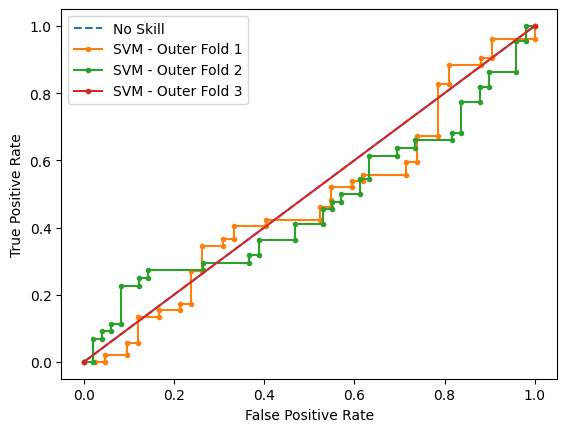

In [115]:
combinedROCPlot(clf_name, featureSubset, param_1, param_2, trainScore, testScore, aucScore, falsePositiveRate, truePositiveRate)

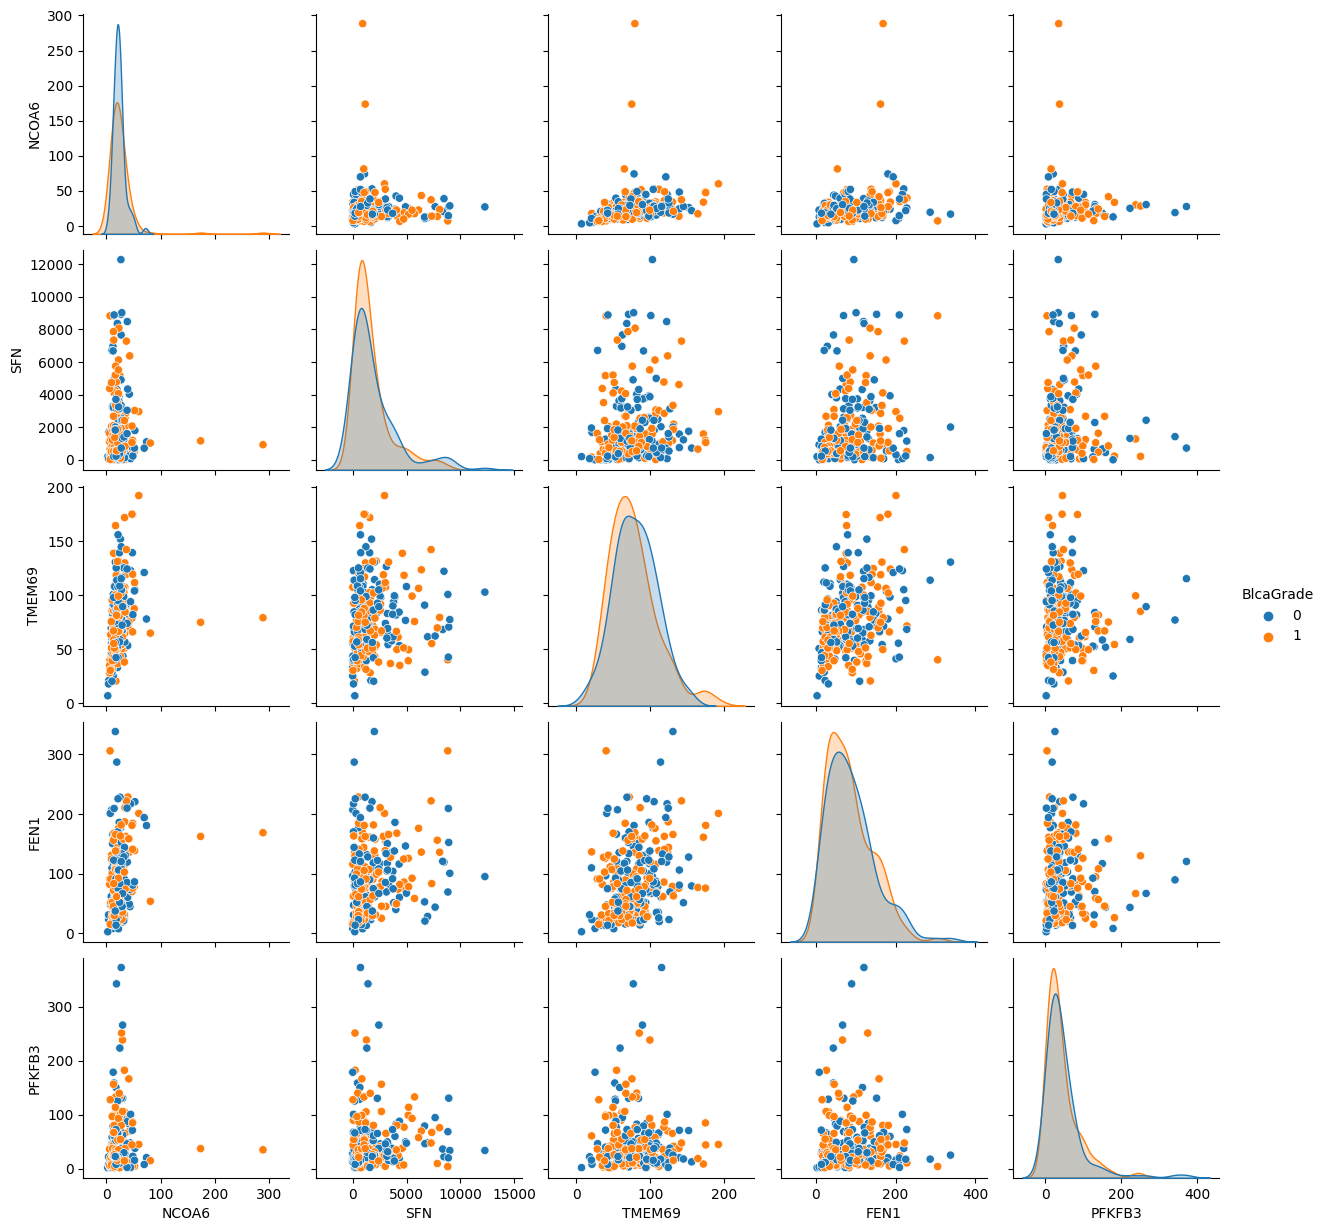

In [117]:
listB = [78, 68, 48, 59, 61]

res = list(map(selectedFeatures.__getitem__, listB))
res.append('BlcaGrade')
sns.pairplot(data[res], hue='BlcaGrade', palette='tab10')

## **Gradient Boosting**

In [165]:
# Global variables
# These lines of code are initializing several empty lists 
# which will be used later in the program to store data or results
# Resetting global variable data for other classifiers
param_1 = []
param_2 = []
trainScore = []
testScore = []
falsePositiveRate = []
truePositiveRate = []
aucScore = []
featureSubset = []



---


### **Evaluating Outer Fold 1**

---



In [166]:
# Classifier Name
clf_name = 'Gradient Boosting'
# Classifier's class name
clf = GradientBoostingClassifier
# Argument 1 name for classifier 
clf_arguments1 = 'n_estimators'
# Argument 2 name for classifier
clf_arguments2 = 'max_depth'
# Values of argument 1 parameter list for classifier
params1 = [[5, 15], [20, 25], [30, 35], [50, 60], [70, 100]]
# Values of argument 2 parameter list for classifier
params2 = [[1, 2], [2, 3], [3, 4], [4, 6], [5, 7]]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_1, label_1)

Iteration 1 >> Feature: 59; n_estimators: 100; max_depth: 7; Train Accuracy: 1.0; Test Accuracy: 0.6347; Selected Features: [59]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 34; n_estimators: 60; max_depth: 4; Train Accuracy: 0.957; Test Accuracy: 0.6344; Selected Features: [59, 34]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 83; n_estimators: 30; max_depth: 3; Train Accuracy: 0.7836; Test Accuracy: 0.6558; Selected Features: [59, 34, 83]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 49; n_estimators: 25; max_depth: 2; Train Accuracy: 0.7446; Test Accuracy: 0.6607; Selected Features: [59, 34, 83, 49]
-----------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 71.5054
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 56.383
--------------------------------------------------------------------------------------------------
n_estimators: 15
max_depth: 1
Features:  [59, 34, 83, 49, 57]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.508197  0.738095  0.601942        42
           1   0.666667  0.423077  0.517647        52

    accuracy                       0.563830        94
   macro avg   0.587432  0.580586  0.559794        94
weighted avg   0.595861  0.563830  0.555311        94

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Gradient Boosting:

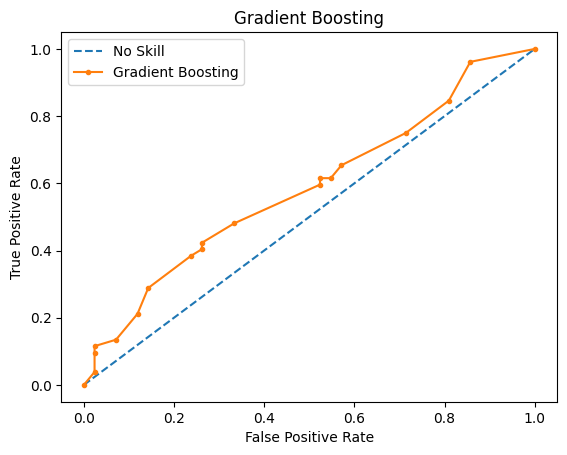

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


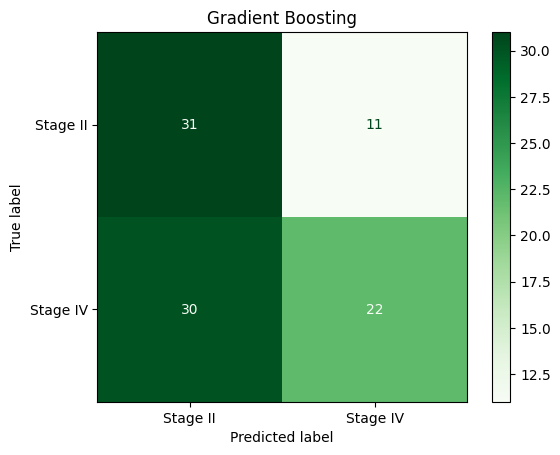

In [167]:
# Values of argument 1 parameter list for classifier
param1 = 15
# Values of argument 2 parameter list for classifier
param2 = 1

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_1, label_1, outerFold_features_3, outerFold_labels_3, label_names)



---


### **Evaluating Outer Fold 2**

---



In [169]:
# Values of argument 1 parameter list for classifier
params1 = [[5, 15], [20, 25], [3, 35], [80, 90], [100, 150]]
# Values of argument 2 parameter list for classifier
params2 = [[3, 5], [7, 4], [6, 3], [1, 6], [5, 2]]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_2, label_2)

Iteration 1 >> Feature: 43; n_estimators: 150; max_depth: 5; Train Accuracy: 1.0; Test Accuracy: 0.6414; Selected Features: [43]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 56; n_estimators: 90; max_depth: 1; Train Accuracy: 0.6858; Test Accuracy: 0.6418; Selected Features: [43, 56]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 86; n_estimators: 35; max_depth: 6; Train Accuracy: 0.9666; Test Accuracy: 0.6368; Selected Features: [43, 56, 86]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 67; n_estimators: 25; max_depth: 7; Train Accuracy: 0.9906; Test Accuracy: 0.6367; Selected Features: [43, 56, 86, 67]
----------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 78.6096
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 53.7634
--------------------------------------------------------------------------------------------------
n_estimators: 90
max_depth: 1
Features:  [43, 56, 86, 67, 83]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.552632  0.446809  0.494118        47
           1   0.527273  0.630435  0.574257        46

    accuracy                       0.537634        93
   macro avg   0.539952  0.538622  0.534188        93
weighted avg   0.540088  0.537634  0.533757        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Gradient Boosting

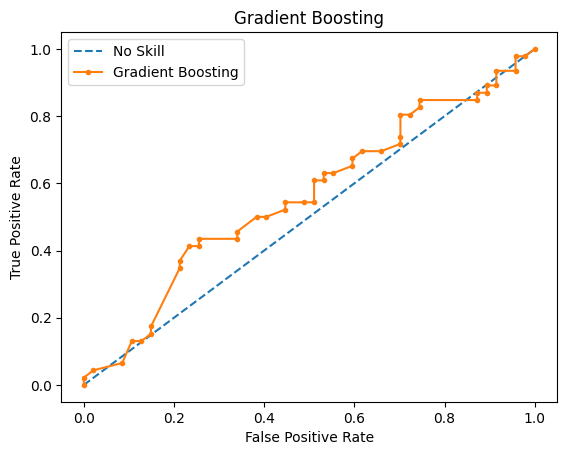

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


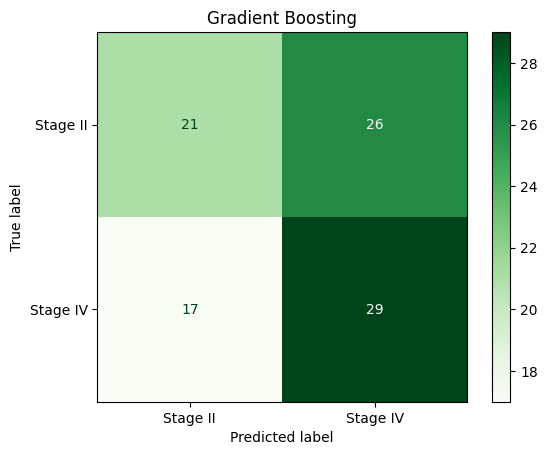

In [170]:
# Values of argument 1 parameter list for classifier
param1 = 90
# Values of argument 2 parameter list for classifier
param2 = 1

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_2, label_2, outerFold_features_2, outerFold_labels_2, label_names)



---


### **Evaluating Outer Fold 3**

---



In [171]:
# Values of argument 1 parameter list for classifier
params1 = [[5, 15], [20, 25], [40, 50], [70, 60], [150, 200]]
# Values of argument 2 parameter list for classifier
params2 = [[2, 4], [3, 4], [3, 5], [4, 5], [1, 6]]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_3, label_3)

Iteration 1 >> Feature: 76; n_estimators: 150; max_depth: 1; Train Accuracy: 0.7152; Test Accuracy: 0.6472; Selected Features: [76]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 66; n_estimators: 60; max_depth: 5; Train Accuracy: 0.9907; Test Accuracy: 0.6427; Selected Features: [76, 66]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 7; n_estimators: 50; max_depth: 5; Train Accuracy: 0.9826; Test Accuracy: 0.6411; Selected Features: [76, 66, 7]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 39; n_estimators: 25; max_depth: 4; Train Accuracy: 0.869; Test Accuracy: 0.6474; Selected Features: [76, 66, 7, 39]
-----------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 78.0749
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 43.010799999999996
--------------------------------------------------------------------------------------------------
n_estimators: 15
max_depth: 2
Features:  [76, 66, 7, 39, 2]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.456522  0.428571  0.442105        49
           1   0.404255  0.431818  0.417582        44

    accuracy                       0.430108        93
   macro avg   0.430389  0.430195  0.429844        93
weighted avg   0.431794  0.430108  0.430503        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Gradient

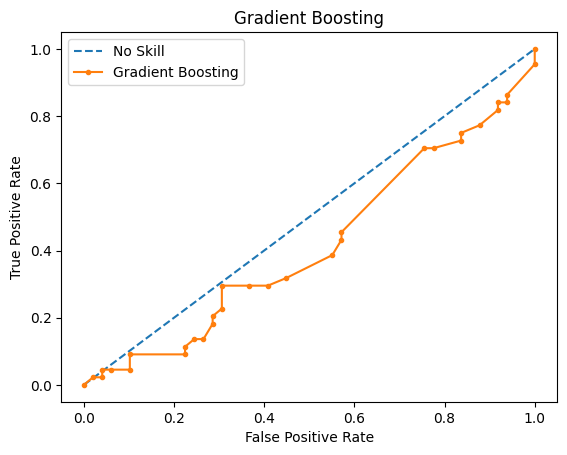

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


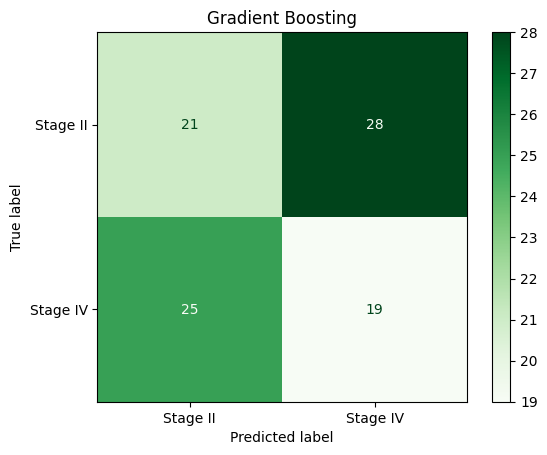

In [172]:
# Values of argument 1 parameter list for classifier
param1 = 15
# Values of argument 2 parameter list for classifier
param2 = 2

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_3, label_3, outerFold_features_1, outerFold_labels_1, label_names)

### **Comparison among Outer Fold Results**

--------------------------------------------
Outer Fold 1 Result
--------------------------------------------
Feature Subset:  [59, 34, 83, 49, 57]
Best n_estimator:  15
Best max_depth:  1
Train Score:  71.5054
Test Score:  56.383
AUC Score:  0.5860805860805861
--------------------------------------------
Outer Fold 2 Result
--------------------------------------------
Feature Subset:  [43, 56, 86, 67, 83]
Best n_estimator:  90
Best max_depth:  1
Train Score:  78.6096
Test Score:  53.7634
AUC Score:  0.5598982423681778
--------------------------------------------
Outer Fold 3 Result
--------------------------------------------
Feature Subset:  [76, 66, 7, 39, 2]
Best n_estimator:  15
Best max_depth:  2
Train Score:  78.0749
Test Score:  43.010799999999996
AUC Score:  0.41558441558441556


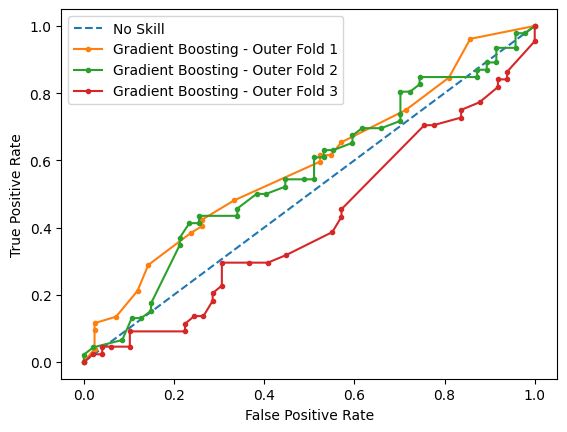

In [173]:
combinedROCPlot(clf_name, featureSubset, param_1, param_2, trainScore, testScore, aucScore, falsePositiveRate, truePositiveRate)

In [176]:
#listB = [76, 66, 7, 39, 2]
listB = [66, 33, 84, 55, 99]

res = list(map(selectedFeatures.__getitem__, listB))
res.append('BlcaGrade')
sns.pairplot(data[res], hue='BlcaGrade', palette='tab10')

TypeError: 'list' object is not callable

## **KNN**

In [177]:
# Global variables
# These lines of code are initializing several empty lists 
# which will be used later in the program to store data or results
# Resetting global variable data for other classifiers
param_1 = []
param_2 = []
trainScore = []
testScore = []
falsePositiveRate = []
truePositiveRate = []
aucScore = []
featureSubset = []



---


### **Evaluating Outer Fold 1**

---



In [187]:
# Classifier Name
clf_name = 'KNN'
# Classifier's class name
clf = KNeighborsClassifier
# Argument 1 name for classifier 
clf_arguments1 = 'n_neighbors'
# Argument 2 name for classifier
clf_arguments2 = 'weights'
# Values of argument 1 parameter list for classifier
params1 = [[2, 5], [10, 15], [7, 20], [25, 9], [30, 35]]
# Values of argument 2 parameter list for classifier
params2 = [['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_1, label_1)

Iteration 1 >> Feature: 83; n_neighbors: 30; weights: distance; Train Accuracy: 0.9301; Test Accuracy: 0.629; Selected Features: [83]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 78; n_neighbors: 9; weights: uniform; Train Accuracy: 0.6989; Test Accuracy: 0.6397; Selected Features: [83, 78]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 69; n_neighbors: 7; weights: uniform; Train Accuracy: 0.7164; Test Accuracy: 0.64; Selected Features: [83, 78, 69]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 59; n_neighbors: 10; weights: distance; Train Accuracy: 1.0; Test Accuracy: 0.6403; Selected Features: [83, 78, 69, 59]
--------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 75.2688
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 47.8723
--------------------------------------------------------------------------------------------------
n_neighbors: 2
weights: uniform
Features:  [83, 78, 69, 59, 18]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.452055  0.785714  0.573913        42
           1   0.571429  0.230769  0.328767        52

    accuracy                       0.478723        94
   macro avg   0.511742  0.508242  0.451340        94
weighted avg   0.518091  0.478723  0.438300        94

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
KNN: ROC AUC=0.

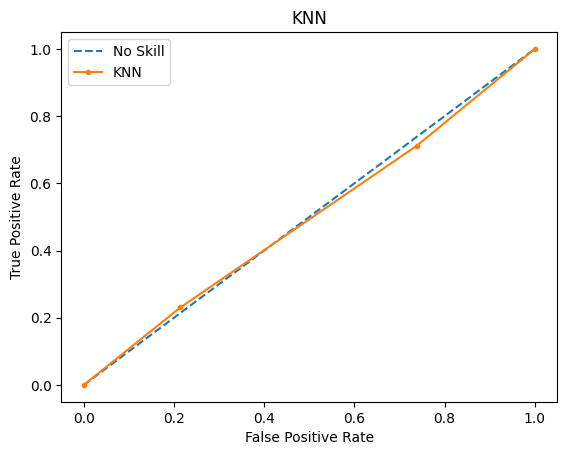

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


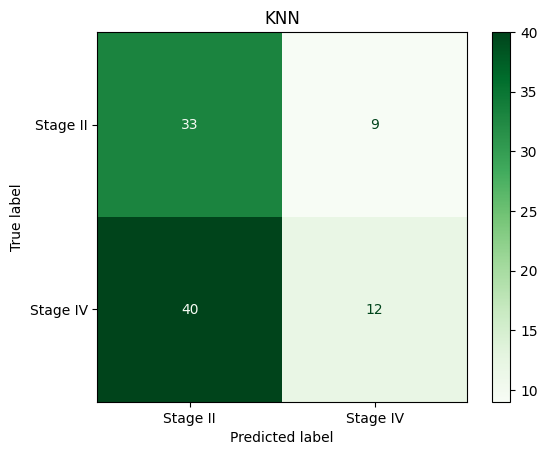

In [188]:
# Values of argument 1 parameter list for classifier
param1 = 2
# Values of argument 2 parameter list for classifier
param2 = 'uniform'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_1, label_1, outerFold_features_3, outerFold_labels_3, label_names)



---


### **Evaluating Outer Fold 2**

---



In [181]:
# Values of argument 1 parameter list for classifier
params1 = [[2, 5], [3, 7], [5, 3], [9, 3], [7,25]]
# Values of argument 2 parameter list for classifier
params2 = [['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_2, label_2)

Iteration 1 >> Feature: 98; n_neighbors: 25; weights: distance; Train Accuracy: 1.0; Test Accuracy: 0.6474; Selected Features: [98]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 55; n_neighbors: 9; weights: distance; Train Accuracy: 0.9947; Test Accuracy: 0.6523; Selected Features: [98, 55]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 43; n_neighbors: 3; weights: distance; Train Accuracy: 1.0; Test Accuracy: 0.6467; Selected Features: [98, 55, 43]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 67; n_neighbors: 3; weights: distance; Train Accuracy: 1.0; Test Accuracy: 0.637; Selected Features: [98, 55, 43, 67]
-----------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 100.0
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 49.4624
--------------------------------------------------------------------------------------------------
n_neighbors: 5
weights: distance
Features:  [98, 55, 43, 67, 86]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.500000  0.425532  0.459770        47
           1   0.490566  0.565217  0.525253        46

    accuracy                       0.494624        93
   macro avg   0.495283  0.495375  0.492511        93
weighted avg   0.495334  0.494624  0.492159        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
KNN: ROC AUC=0.5

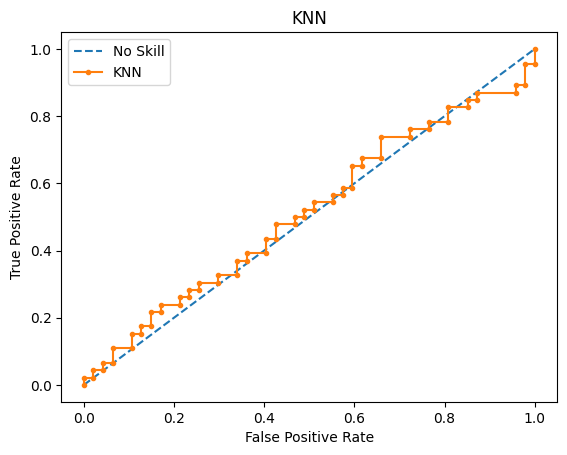

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


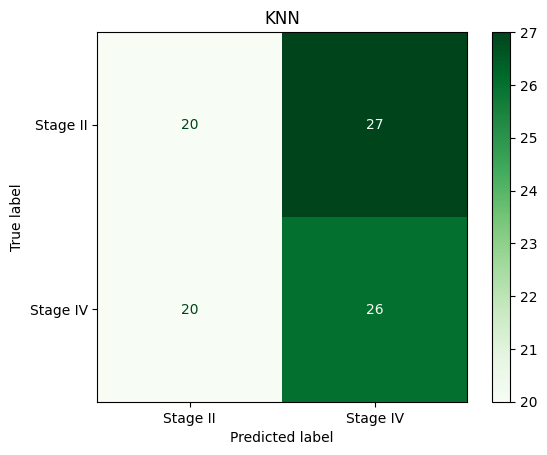

In [182]:
# Values of argument 1 parameter list for classifier
param1 = 5
# Values of argument 2 parameter list for classifier
param2 = 'distance'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_2, label_2, outerFold_features_2, outerFold_labels_2, label_names)



---


### **Evaluating Outer Fold 3**

---



In [183]:
# Values of argument 1 parameter list for classifier
params1 = [[2, 1], [5, 3], [10, 7], [15, 9], [9, 11]]
# Values of argument 2 parameter list for classifier
params2 = [['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance'], ['uniform', 'distance']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_3, label_3)

Iteration 1 >> Feature: 76; n_neighbors: 9; weights: uniform; Train Accuracy: 0.7247; Test Accuracy: 0.6583; Selected Features: [76]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 2; n_neighbors: 9; weights: uniform; Train Accuracy: 0.6953; Test Accuracy: 0.6469; Selected Features: [76, 2]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 66; n_neighbors: 10; weights: distance; Train Accuracy: 1.0; Test Accuracy: 0.6374; Selected Features: [76, 2, 66]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 21; n_neighbors: 3; weights: uniform; Train Accuracy: 0.7794; Test Accuracy: 0.6414; Selected Features: [76, 2, 66, 21]
-----------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 85.5615
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 50.537600000000005
--------------------------------------------------------------------------------------------------
n_neighbors: 3
weights: uniform
Features:  [76, 2, 66, 21, 87]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.542857  0.387755  0.452381        49
           1   0.482759  0.636364  0.549020        44

    accuracy                       0.505376        93
   macro avg   0.512808  0.512059  0.500700        93
weighted avg   0.514423  0.505376  0.498102        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
KNN: 

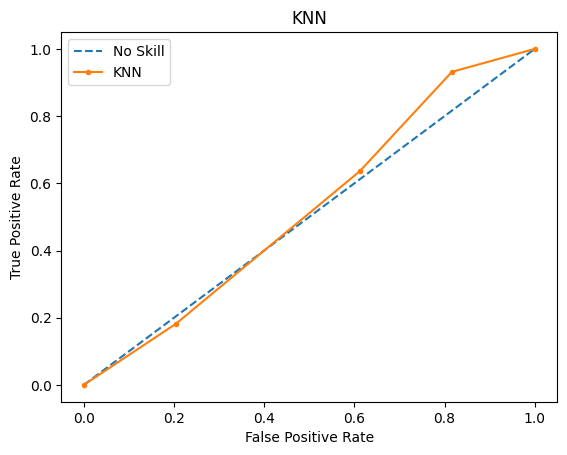

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


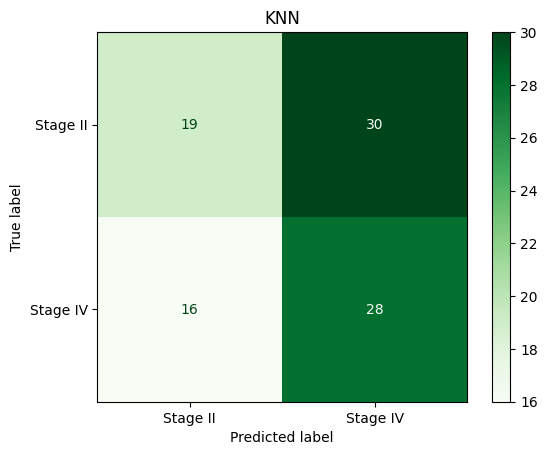

In [185]:
# Values of argument 1 parameter list for classifier
param1 = 3
# Values of argument 2 parameter list for classifier
param2 = 'uniform'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_3, label_3, outerFold_features_1, outerFold_labels_1, label_names)

### **Comparison among Outer Fold Results**

--------------------------------------------
Outer Fold 1 Result
--------------------------------------------
Feature Subset:  [83, 78, 69, 59, 18]
Best n_estimator:  9
Best max_depth:  uniform
Train Score:  62.3656
Test Score:  46.808499999999995
AUC Score:  0.4700091575091575
--------------------------------------------
Outer Fold 2 Result
--------------------------------------------
Feature Subset:  [83, 78, 69, 59, 18]
Best n_estimator:  2
Best max_depth:  uniform
Train Score:  75.2688
Test Score:  47.8723
AUC Score:  0.49565018315018317
--------------------------------------------
Outer Fold 3 Result
--------------------------------------------
Feature Subset:  [98, 55, 43, 67, 86]
Best n_estimator:  5
Best max_depth:  distance
Train Score:  100.0
Test Score:  49.4624
AUC Score:  0.5129509713228492


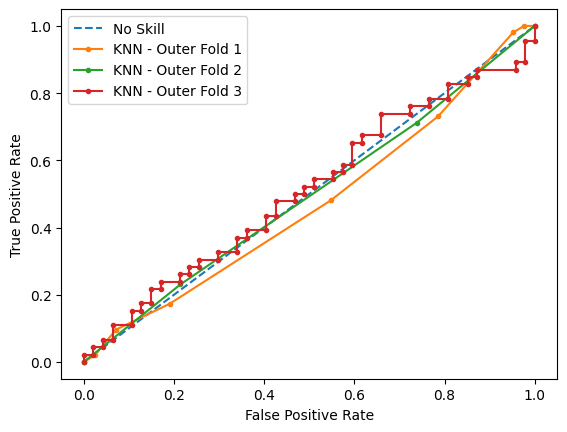

In [189]:
combinedROCPlot(clf_name, featureSubset, param_1, param_2, trainScore, testScore, aucScore, falsePositiveRate, truePositiveRate)

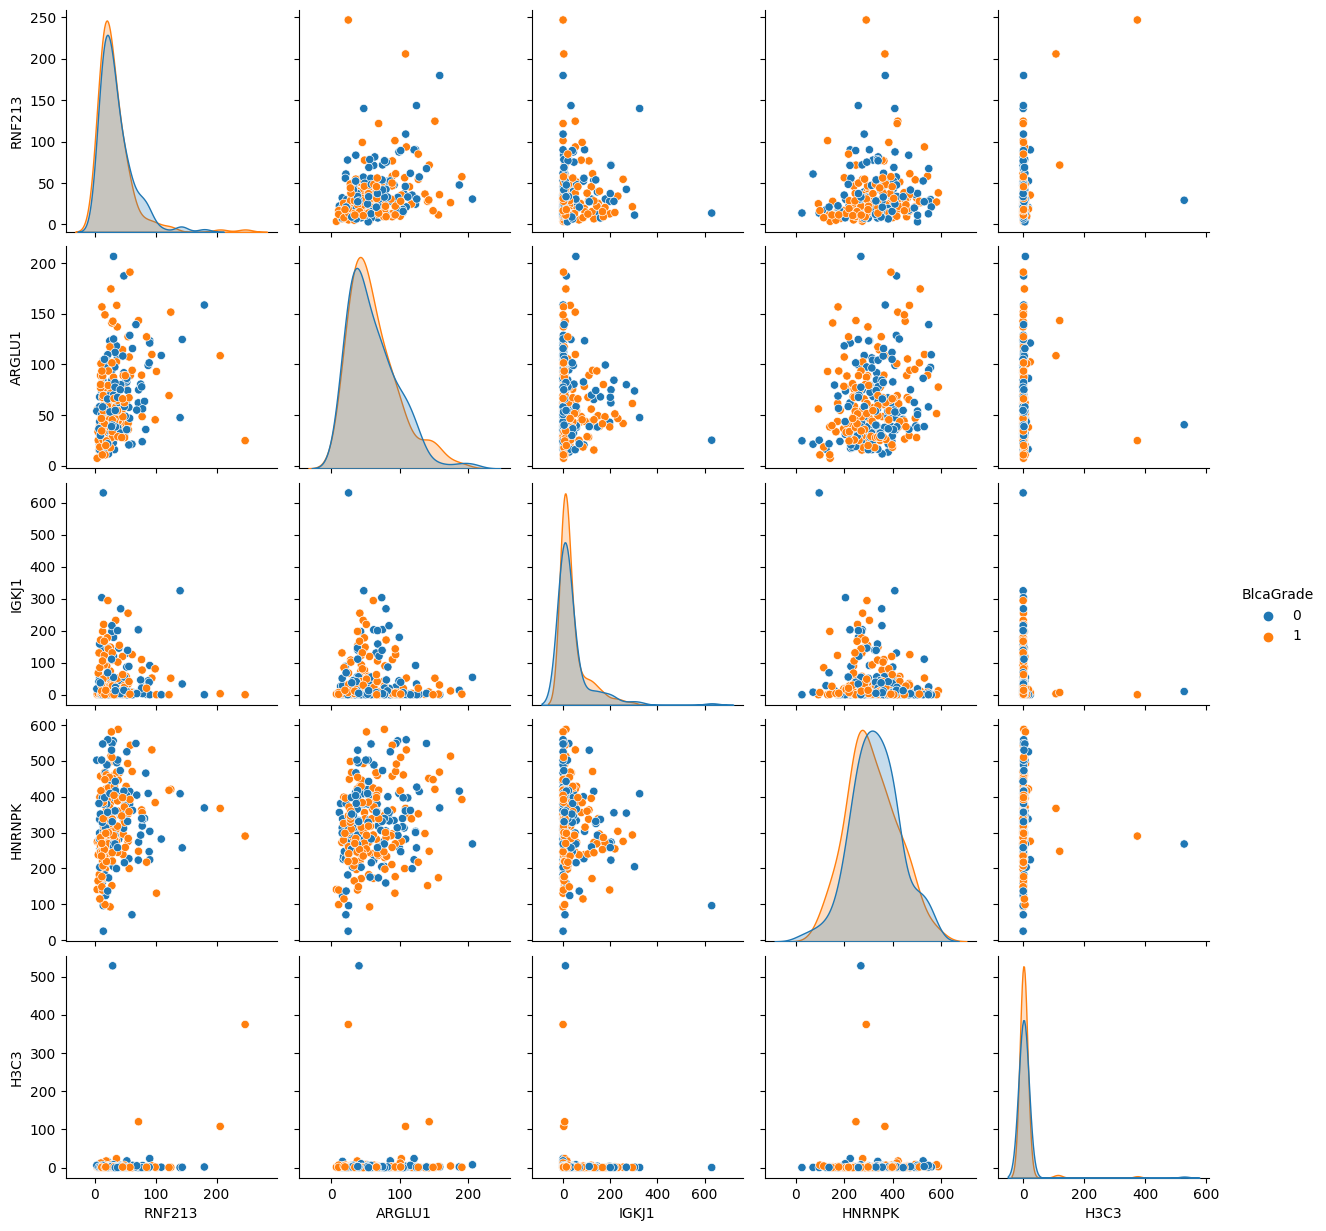

In [134]:
listB = [66, 33, 84, 55, 99]

res = list(map(selectedFeatures.__getitem__, listB))
res.append('BlcaGrade')
sns.pairplot(data[res], hue='BlcaGrade', palette='tab10')

## **Logistic Regression**

In [135]:
# Global variables
# These lines of code are initializing several empty lists 
# which will be used later in the program to store data or results
# Resetting global variable data for other classifiers
param_1 = []
param_2 = []
trainScore = []
testScore = []
falsePositiveRate = []
truePositiveRate = []
aucScore = []
featureSubset = []



---


### **Evaluating Outer Fold 1**

---



In [137]:
# Classifier Name
clf_name = 'Logistic Regression'
# Classifier's class name
clf = LogisticRegression
# Argument 1 name for classifier 
clf_arguments1 = 'solver'
# Argument 2 name for classifier
clf_arguments2 = 'penalty'
# Values of argument 1 parameter list for classifier
params1 = [['lbfgs', 'liblinear'], ['lbfgs', 'liblinear'], ['lbfgs', 'liblinear'], ['lbfgs', 'liblinear'], ['lbfgs', 'liblinear']]
# Values of argument 2 parameter list for classifier
params2 = [['l2'], ['l2'], ['l2'], [ 'l2'], ['l2']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_1, label_1)

Iteration 1 >> Feature: 53; solver: lbfgs; penalty: l2; Train Accuracy: 0.6317; Test Accuracy: 0.6347; Selected Features: [53]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 36; solver: lbfgs; penalty: l2; Train Accuracy: 0.617; Test Accuracy: 0.6245; Selected Features: [53, 36]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 79; solver: lbfgs; penalty: l2; Train Accuracy: 0.5658; Test Accuracy: 0.5912; Selected Features: [53, 36, 79]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 50; solver: lbfgs; penalty: l2; Train Accuracy: 0.5779; Test Accuracy: 0.575; Selected Features: [53, 36, 79, 50]
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 67.20429999999999
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 40.4255
--------------------------------------------------------------------------------------------------
solver: lbfgs
penalty: l2
Features:  [53, 36, 79, 50, 77]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.333333  0.333333  0.333333        42
           1   0.461538  0.461538  0.461538        52

    accuracy                       0.404255        94
   macro avg   0.397436  0.397436  0.397436        94
weighted avg   0.404255  0.404255  0.404255        94

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Logistic Re

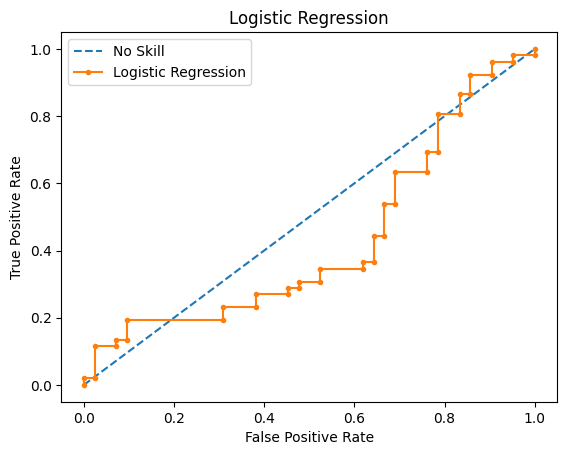

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


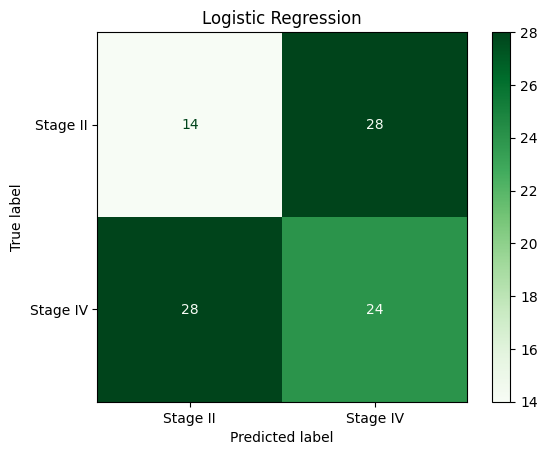

In [138]:
# Values of argument 1 parameter list for classifier
param1 = 'lbfgs'
# Values of argument 2 parameter list for classifier
param2 = 'l2'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_1, label_1, outerFold_features_3, outerFold_labels_3, label_names)



---


### **Evaluating Outer Fold 2**

---



In [139]:
# Values of argument 1 parameter list for classifier
params1 =   [['lbfgs', 'liblinear'], ['lbfgs', 'sag'], ['lbfgs', 'sag'], ['lbfgs', 'sag'], ['lbfgs', 'sag']]
# Values of argument 2 parameter list for classifier
params2 = [['l2'], ['l2'], ['l2'], ['l2'], ['l2']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_2, label_2)

Iteration 1 >> Feature: 22; solver: lbfgs; penalty: l2; Train Accuracy: 0.5923; Test Accuracy: 0.5993; Selected Features: [22]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 49; solver: lbfgs; penalty: l2; Train Accuracy: 0.5575; Test Accuracy: 0.5836; Selected Features: [22, 49]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 31; solver: lbfgs; penalty: l2; Train Accuracy: 0.5869; Test Accuracy: 0.5667; Selected Features: [22, 49, 31]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 55; solver: lbfgs; penalty: l2; Train Accuracy: 0.5655; Test Accuracy: 0.5617; Selected Features: [22, 49, 31, 55]
------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 54.545500000000004
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 50.537600000000005
--------------------------------------------------------------------------------------------------
solver: lbfgs
penalty: l2
Features:  [22, 49, 31, 55, 98]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.514286  0.382979  0.439024        47
           1   0.500000  0.630435  0.557692        46

    accuracy                       0.505376        93
   macro avg   0.507143  0.506707  0.498358        93
weighted avg   0.507220  0.505376  0.497720        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500

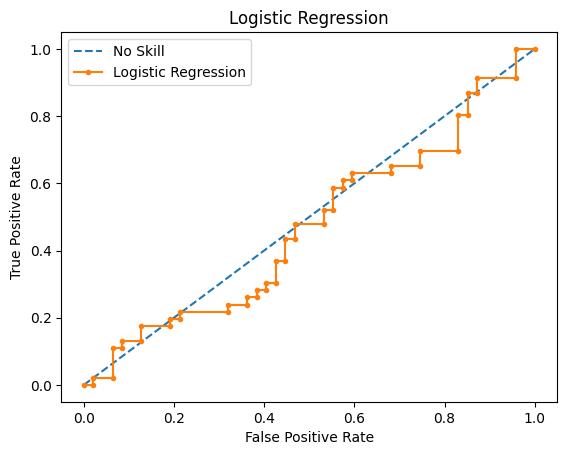

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


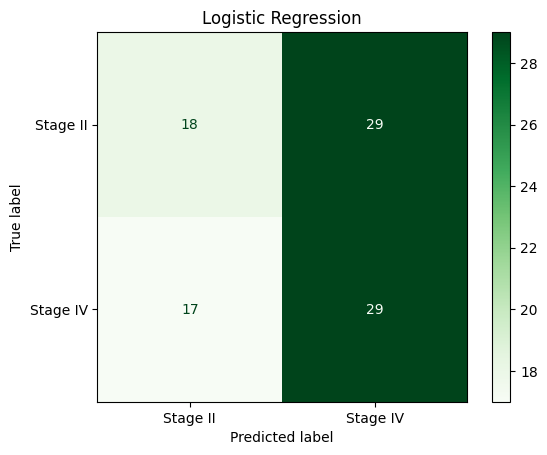

In [140]:
# Values of argument 1 parameter list for classifier
param1 = 'lbfgs'
# Values of argument 2 parameter list for classifier
param2 = 'l2'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_2, label_2, outerFold_features_2, outerFold_labels_2, label_names)



---


### **Evaluating Outer Fold 3**

---



In [142]:
# Values of argument 1 parameter list for classifier
params1 = [['lbfgs', 'liblinear'], ['lbfgs', 'liblinear'], ['lbfgs', 'liblinear'], ['lbfgs', 'liblinear'], ['lbfgs', 'liblinear']]
# Values of argument 2 parameter list for classifier
params2 = [['l2'], ['l2'], ['l2'], ['l2'], ['l2']]
# Empty list for FFS - Global Variable
featuresOuterFold = []
# Invoking FFS
outerFold(clf, clf_arguments1, clf_arguments2, params1, params2, features_3, label_3)

Iteration 1 >> Feature: 22; solver: liblinear; penalty: l2; Train Accuracy: 0.5963; Test Accuracy: 0.5991; Selected Features: [22]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 2 >> Feature: 64; solver: liblinear; penalty: l2; Train Accuracy: 0.5829; Test Accuracy: 0.5989; Selected Features: [22, 64]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 3 >> Feature: 67; solver: lbfgs; penalty: l2; Train Accuracy: 0.5802; Test Accuracy: 0.5935; Selected Features: [22, 64, 67]
---------------------------------------------------------------------------------------------------------------------------------
Iteration 4 >> Feature: 1; solver: liblinear; penalty: l2; Train Accuracy: 0.5441; Test Accuracy: 0.567; Selected Features: [22, 64, 67, 1]
---------------------------------------------------------------------

--------------------------------------------------------------------------------------------------
Training Score on outer fold: 67.9144
--------------------------------------------------------------------------------------------------
Test Accuracy on outer fold: 48.3871
--------------------------------------------------------------------------------------------------
solver: liblinear
penalty: l2
Features:  [22, 64, 67, 1, 11]
--------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0   0.511111  0.469388  0.489362        49
           1   0.458333  0.500000  0.478261        44

    accuracy                       0.483871        93
   macro avg   0.484722  0.484694  0.483811        93
weighted avg   0.486141  0.483871  0.484110        93

--------------------------------------------------------------------------------------------------
No Skill: ROC AUC=0.500
Logistic Regressio

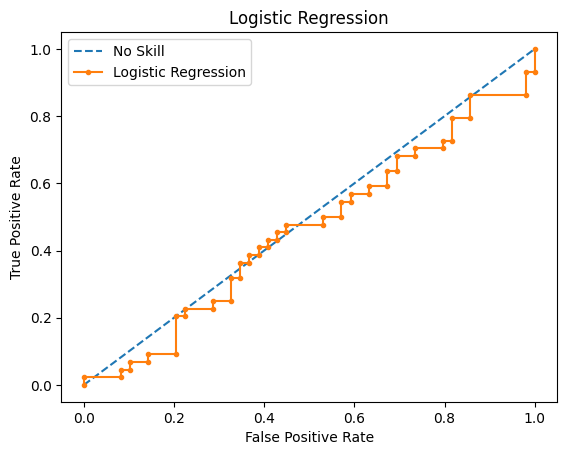

--------------------------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------------------------


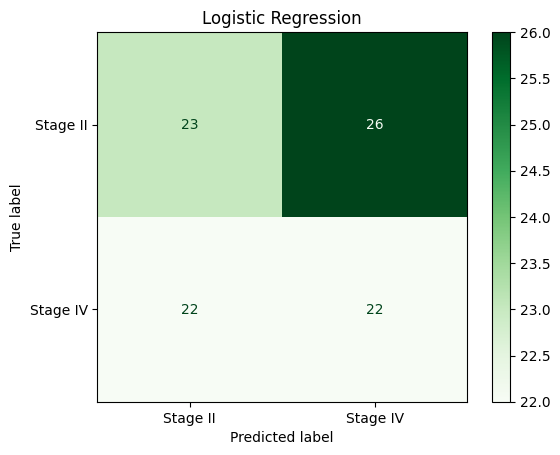

In [143]:
# Values of argument 1 parameter list for classifier
param1 = 'liblinear'
# Values of argument 2 parameter list for classifier
param2 = 'l2'

evaluationOuterFold(clf_name, clf, clf_arguments1, clf_arguments2, param1, param2, featuresOuterFold, features_3, label_3, outerFold_features_1, outerFold_labels_1, label_names)

### **Comparison among Outer Fold Results**

--------------------------------------------
Outer Fold 1 Result
--------------------------------------------
Feature Subset:  [53, 36, 79, 50, 77]
Best n_estimator:  lbfgs
Best max_depth:  l2
Train Score:  67.20429999999999
Test Score:  40.4255
AUC Score:  0.42994505494505497
--------------------------------------------
Outer Fold 2 Result
--------------------------------------------
Feature Subset:  [22, 49, 31, 55, 98]
Best n_estimator:  lbfgs
Best max_depth:  l2
Train Score:  54.545500000000004
Test Score:  50.537600000000005
AUC Score:  0.46993524514338575
--------------------------------------------
Outer Fold 3 Result
--------------------------------------------
Feature Subset:  [22, 64, 67, 1, 11]
Best n_estimator:  liblinear
Best max_depth:  l2
Train Score:  67.9144
Test Score:  48.3871
AUC Score:  0.4615027829313544


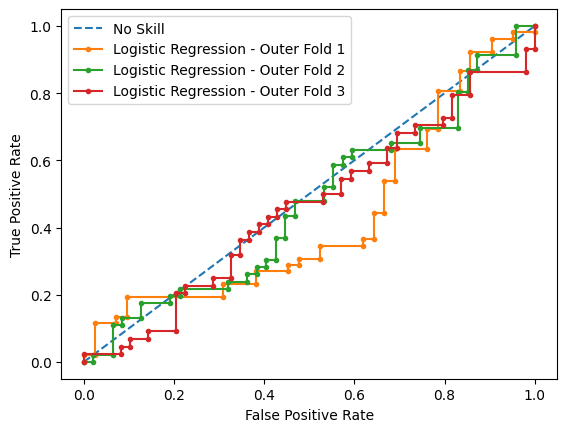

In [144]:
combinedROCPlot(clf_name, featureSubset, param_1, param_2, trainScore, testScore, aucScore, falsePositiveRate, truePositiveRate)

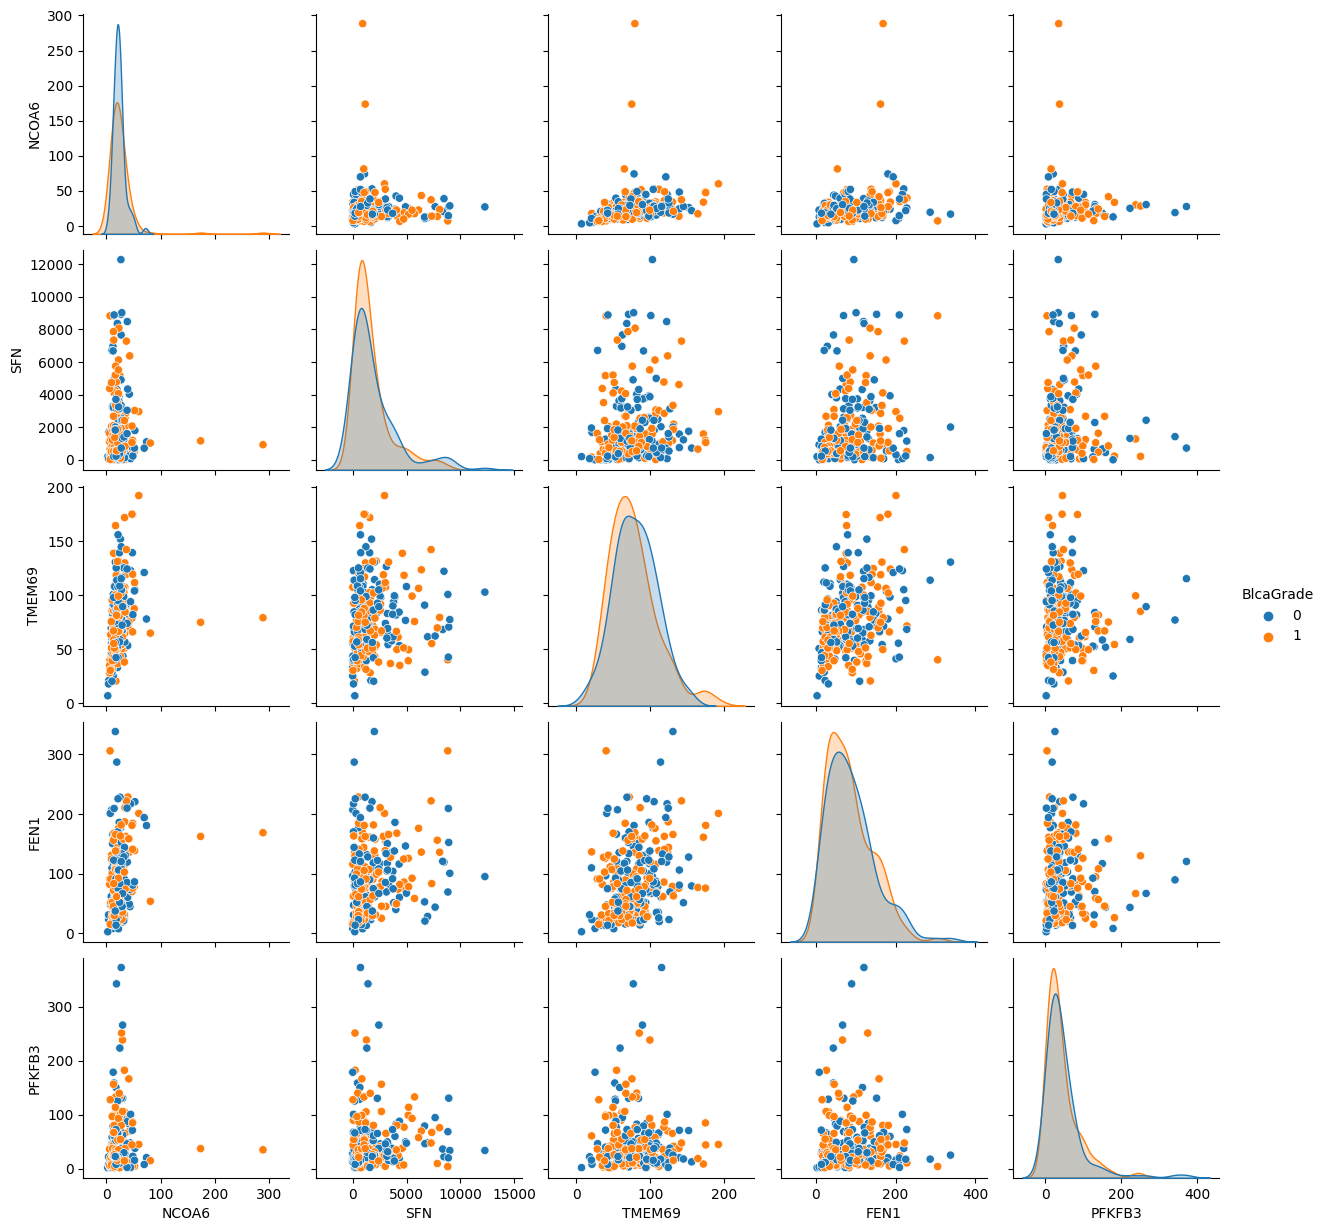

In [145]:
listB = [78, 68, 48, 59, 61]

res = list(map(selectedFeatures.__getitem__, listB))
res.append('BlcaGrade')
sns.pairplot(data[res], hue='BlcaGrade', palette='tab10')